# Census Income
## Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

## Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. 

People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [3]:
df.shape

(1000, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

we observe from the info
we have only 3 data types :- Float, Object and int64

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

we observe from the graph _c39 has 1000 total null means 100% value is null.
lets delete this first.

In [6]:
df.drop('_c39', axis = 1, inplace =True)

<AxesSubplot:>

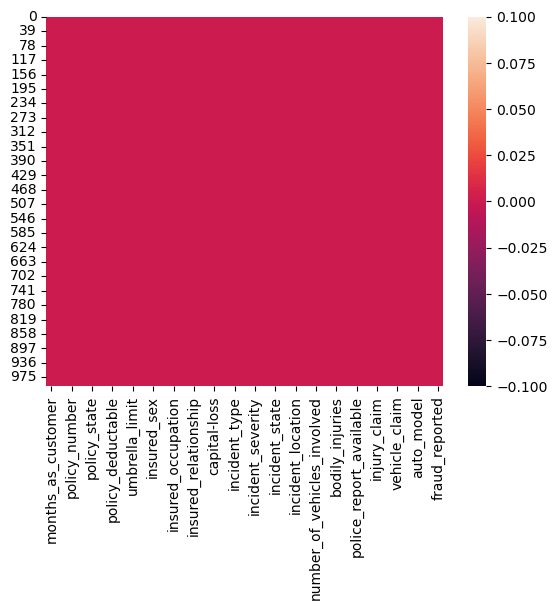

In [7]:
sns.heatmap(df.isnull())

In [8]:
for i in df.columns:
    print(df[i].value_counts())
    print("*"*50)
    

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
**************************************************
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
**************************************************
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64
**************************************************
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    

Here we can see values with there count of each column present in this dataset.

Age has 22 - 43 age froup is present.

Here we can observe that in column umbrella_limit almost(798/1000) 70 to 75% of values are zero, so, 0 values are not going to help in our prediction we can drop this column.

There are also almost 50% 0 values present in the columns capital-gains(508/1000) and capital-loss(475/1000).

And there is value '?' in collission type, property_damage, police_report_available.

There is a column named insured_zip in this column values seems like some sort of id or code given to the insured person

In [9]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Here we can observe that:

    1. policy number has 1000 unique values which means all have unique policy number.
    
    2. inceideny_location also has 1000 unique values 

so best way to drop this columns.It can be affect on our model aslo in cant be helpful for our Analysis.

In [10]:
df.drop(['policy_number','incident_location'],axis =1, inplace =True)

In [11]:
# Lets first drop the column with more than 70% 0 values
df.drop(["umbrella_limit"],axis=1,inplace = True)

In [12]:
# now lets check the value counts for column insured_zip
df[["insured_zip"]].value_counts()

insured_zip
431202         2
477695         2
446895         2
456602         2
469429         2
              ..
455426         1
455482         1
455672         1
455689         1
620962         1
Length: 995, dtype: int64

In [13]:
# 995 value are as zipcode..so we have to drop it.
df.drop(["insured_zip"],axis=1,inplace = True)

In [14]:
df[["policy_annual_premium"]].value_counts()

policy_annual_premium
1374.22                  2
1524.45                  2
1558.29                  2
1362.87                  2
1389.13                  2
                        ..
1151.39                  1
1152.12                  1
1152.40                  1
1153.35                  1
2047.59                  1
Length: 991, dtype: int64

In [15]:
df.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  capital-gains   capital-loss  \
count            1000.000000    1000.000000    1000.000000   
mean             1256.406150   25126.100000  -26793.700000   
std               244.167395   27872.187708   28104.096686   
min               433.330000       0.000000 -111100.000000   
25%              1089.607500       0.000000  -51500.000000   
50%              1257.200000       0.000000  -23250.000000   
75%              1415.695000   51025.000000       0.000000   
max              2047.590000  100500.000000       0.000000   

       incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
count               1000.000000                   1000.00000      1000.000000   
mean                  11.644000                      1.83900         0.992000   
std                    6.951373                      1.01888         0.820127   
min                    0.000000                      1.00000         0.000000   
25%                    6.000000                      1.00000         0.000000   
50%                   12.000000                      1.00000         1.000000   
75%                   17.000000                      3.00000         2.000000   
max                   23.000000                      4.00000         2.000000   

         witnesses  total_claim_amount  injury_claim  property_claim  \
count  1000.000000          1000.00000   1000.000000     1000.000000   
mean      1.487000         52761.94000   7433.420000     7399.570000   
std       1.111335         26401.53319   4880.951853     4824.726179   
min       0.000000           100.00000      0.000000        0.000000   
25%       1.000000         41812.50000   4295.000000     4445.000000   
50%       1.000000         58055.00000   6775.000000     6750.000000   
75%       2.000000         70592.50000  11305.000000    10885.000000   
max       3.000000        114920.00000  21450.000000    23670.000000   

       vehicle_claim    auto_year  
count    1000.000000  1000.000000  
mean    37928.950000  2005.103000  
std     18886.252893     6.015861  
min        70.000000  1995.000000  
25%     30292.500000  2000.000000  
50%     42100.000000  2005.000000  
75%     50822.500000  2010.000000  
max     79560.000000  2015.000000

Here we can see difference in mean and median(50% percentile) in columns, months_as_customer, policy_deductable, capital-gains, capital-loss, number_of_vehicles_involved, witnesses, total_claim_amount, injury_claim, property_claim, vehicle_claim which denotes presence of skewness.

Here we can observe presence of outliers as well as most of the column have big gap in 75%percentile and max.

In [16]:
df.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                

In [17]:
# Extracting day, month and year from incident_date and Policy_bind_date.
# But first lets change there datatype from object to datetime
df['incident_date']= pd.to_datetime(df['incident_date'])
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])

In [18]:
df['incident_date_Day']   = df['incident_date'].dt.day
df['incident_date_Month'] = df['incident_date'].dt.month
df['incident_date_Year']  = df['incident_date'].dt.year

In [19]:
df['policy_bind_date_Day']   = df['policy_bind_date'].dt.day
df['policy_bind_date_Month'] = df['policy_bind_date'].dt.month
df['policy_bind_date_Year']  = df['policy_bind_date'].dt.year

In [20]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'incident_date_Day',
       'incident_date_Month', 'incident_date_Year', 'policy_bind_date_Day',
       'policy_bind_date_Month', 'policy_bind_date_Year'],
      dtype='object')

In [21]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                         object
incident_city                          object
incident_hour_of_the_day          

In [22]:
# lets drop both the columns from the dataset
df.drop(['policy_bind_date', 'incident_date'],axis =1, inplace = True)

In [23]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', 'incident_date_Day',
       'incident_date_Month', 'incident_date_Year', 'policy_bind_date_Day',
       'policy_bind_date_Month', 'policy_bind_date_Year'],
      dtype='object')

In [24]:
df['incident_date_Day'].value_counts()

1     200
2     199
17     41
24     41
21     38
14     37
13     37
22     34
19     33
28     33
18     33
23     32
20     32
16     32
15     31
26     28
25     28
27     27
30     21
31     20
3      12
29     11
Name: incident_date_Day, dtype: int64

In [25]:
df['incident_date_Month'].value_counts()

1     365
2     312
8      39
12     39
6      37
4      36
7      35
10     34
3      31
9      30
5      23
11     19
Name: incident_date_Month, dtype: int64

In [26]:
df['incident_date_Year'].value_counts()

2015    1000
Name: incident_date_Year, dtype: int64

Here we can see that incident_year is having all same values i.e 2015. it will not do anything good in predicting our model, so, lets drop this columns.

In [27]:
df.drop('incident_date_Year', axis = 1, inplace= True)

# Replacing ? values

In [28]:
df['collision_type'].mode()

0    Rear Collision
Name: collision_type, dtype: object

In [29]:
# now lets replace it using mode value
df['collision_type']=df.collision_type.str.replace('?','Rear Collision')

In [30]:
df['property_damage'].mode()

0    ?
Name: property_damage, dtype: object

In [31]:
df.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium insured_sex insured_education_level  \
0                1406.91        MALE                      MD   
1                1197.22        MALE                      MD   
2                1413.14      FEMALE                     PhD   
3                1415.74      FEMALE                     PhD   
4                1583.91        MALE               Associate   

  insured_occupation insured_hobbies  ... vehicle_claim  auto_make  \
0       craft-repair        sleeping  ...         52080       Saab   
1  machine-op-inspct         reading  ...          3510   Mercedes   
2              sales     board-games  ...         23100      Dodge   
3       armed-forces     board-games  ...         50720  Chevrolet   
4              sales     board-games  ...          4550     Accura   

   auto_model auto_year fraud_reported incident_date_Day incident_date_Month  \
0         92x      2004              Y                25                   1   
1        E400      2007              Y                21                   1   
2         RAM      2007              N                22                   2   
3       Tahoe      2014              Y                 1                  10   
4         RSX      2009              N                17                   2   

  policy_bind_date_Day policy_bind_date_Month  policy_bind_date_Year  
0                   17                     10                   2014  
1                   27                      6                   2006  
2                    9                      6                   2000  
3                   25                      5                   1990  
4                    6                      6                   2014  

[5 rows x 38 columns]

In [32]:
df.columns.to_list()

['months_as_customer',
 'age',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 'incident_date_Day',
 'incident_date_Month',
 'policy_bind_date_Day',
 'policy_bind_date_Month',
 'policy_bind_date_Year']

In [33]:
#df.ffill(axis = 21 )
#  we try to fix this another method but..anyway we use by the mode methode to solve  this issue.

In [34]:
# Property damage is also categorical column( it has values yes,no and ?)
df['property_damage'] = df.property_damage.str.replace('?', 'NO')

In [35]:
#Police_report_available is also categorical (with Replacing '?' with mode value
df['police_report_available'] = df.police_report_available.str.replace('?', 'NO')


## Lets divide columns object columns and int. or float column at one variable.

In [36]:
# Lets divide columns object columns and int. or float column at one variable.
object=[]
integer=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        object.append(i)
    else:
        integer.append(i)
print('object:- ', object)
print("*"*100)
print('integer:- ',integer)

# we can use also this code to seperate numerical and categorical coulmns
#categorical_col=[]
#for i in df.dtypes.index:
#    if df.dtypes[i]=='object':
#        categorical_col.append(i)
# print('categorical columns : ', categorical_col)

#numerical_col = []
#for i in df.dtypes.index:
#  if df.dtypes[i] != 'object':
#     numerical_col.append(i)    
# print('Numerical columns : ', numerical_col)        

object:-  ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']
****************************************************************************************************
integer:-  ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'incident_date_Day', 'incident_date_Month', 'policy_bind_date_Day', 'policy_bind_date_Month', 'policy_bind_date_Year']


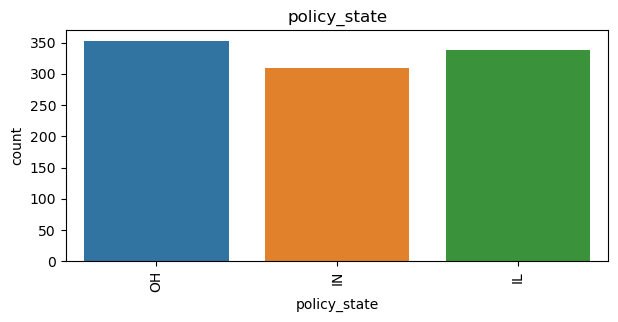

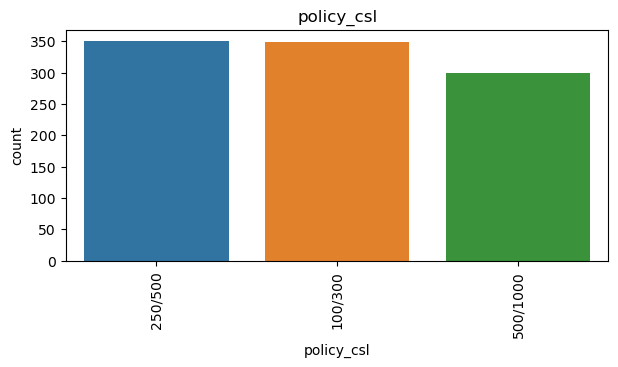

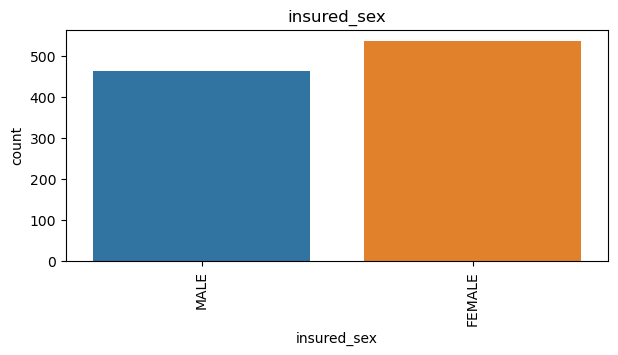

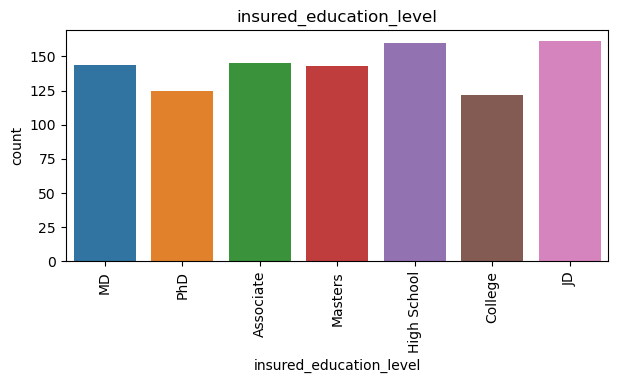

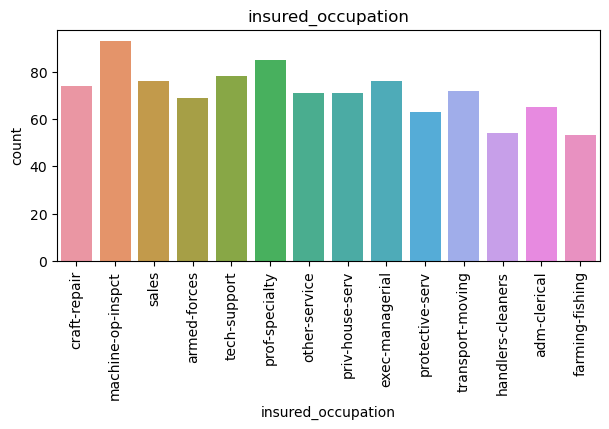

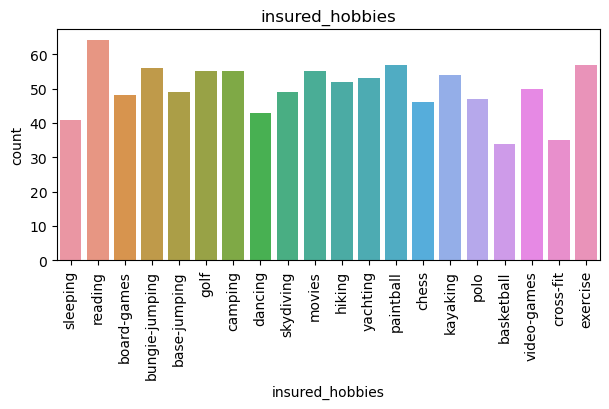

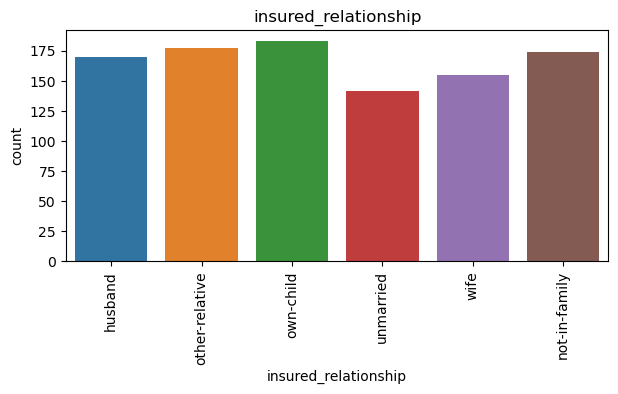

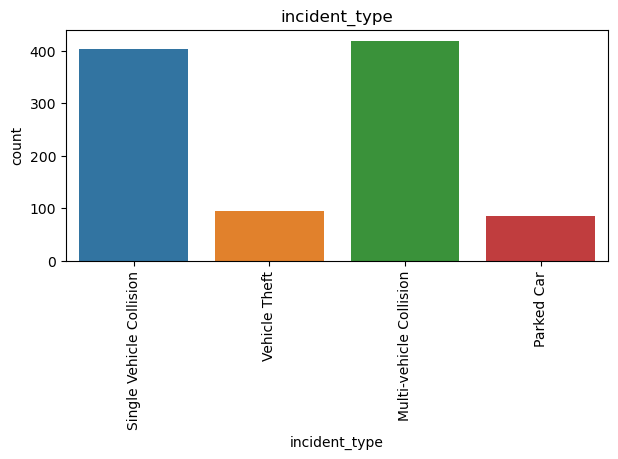

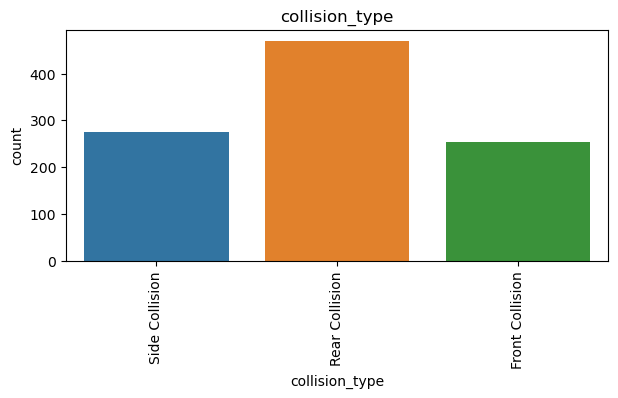

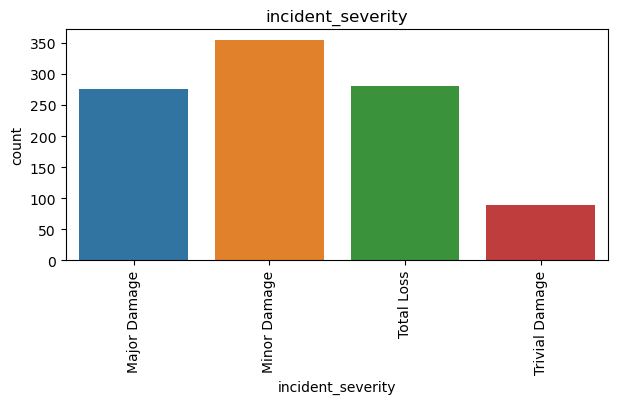

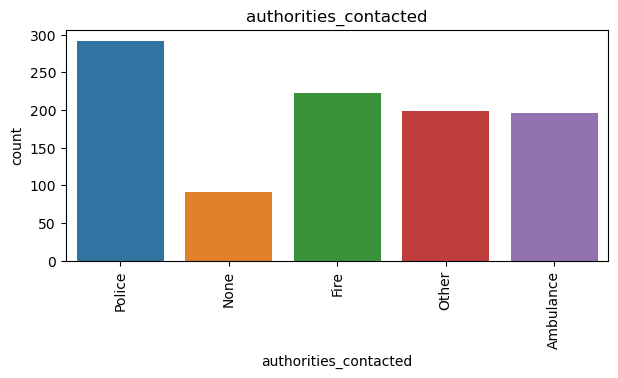

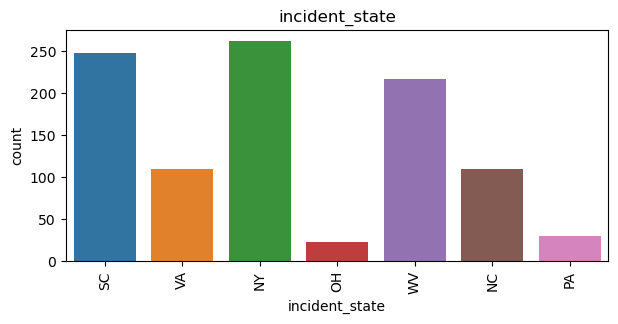

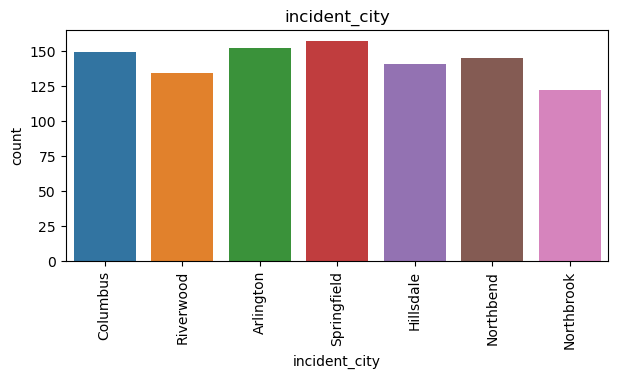

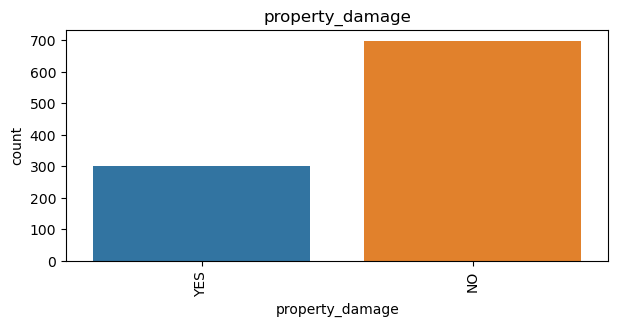

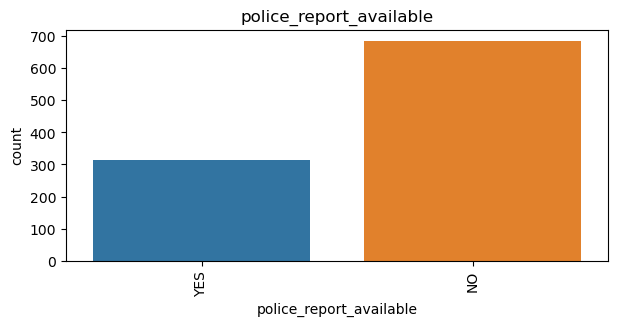

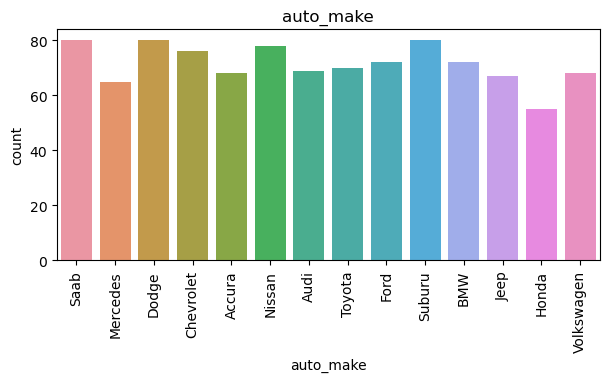

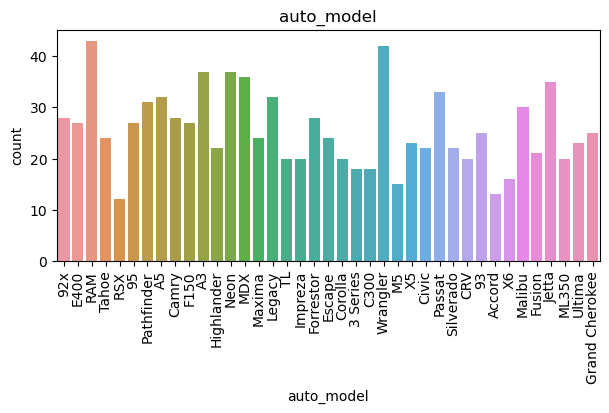

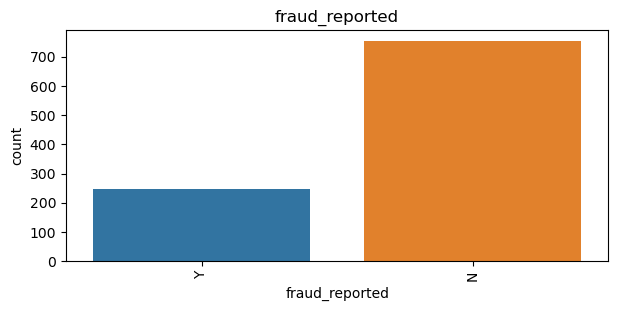

In [37]:
# lets visualize all object columns using barplot
for i in df[object]:
    plt.figure(figsize=(7,3))
    sns.countplot(df[i])
    plt.title(i)
    plt.xticks(rotation=90)
plt.show()

We Observe from The Graph :-(while scrolling down)

in policy_state count is high.

Female insured are more in number.
.
Here we can observe that Multi-vehicle-collision and single-vehicle-collision are more in number.

We can see that Rather than front and side collision Rear Collision has maximum count.

Here we can clearly see that Minor damage has maximum count compared to Trivial damage.

here we can see that Police authorities are contacted the most.

Here we can see that In NY state most of the cases are registered.

In all the cities the insuered climb are almost same.

Here we can also clearly see that our target column is also imbalanced we need to balance it using overfittine method.


<AxesSubplot:xlabel='incident_date_Month', ylabel='collision_type'>

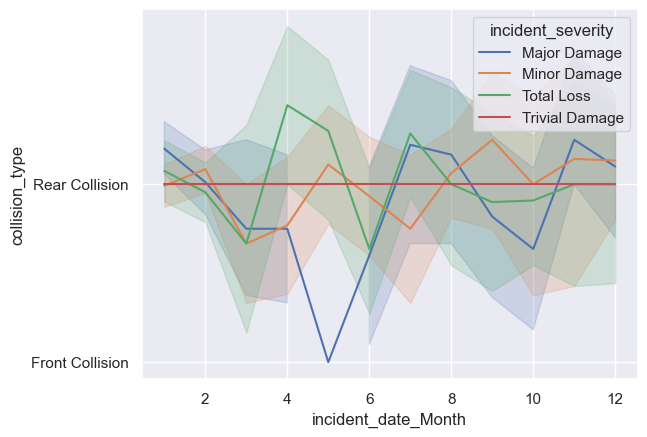

In [38]:
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="incident_date_Month", y='collision_type',
             hue='incident_severity',
             data=df)

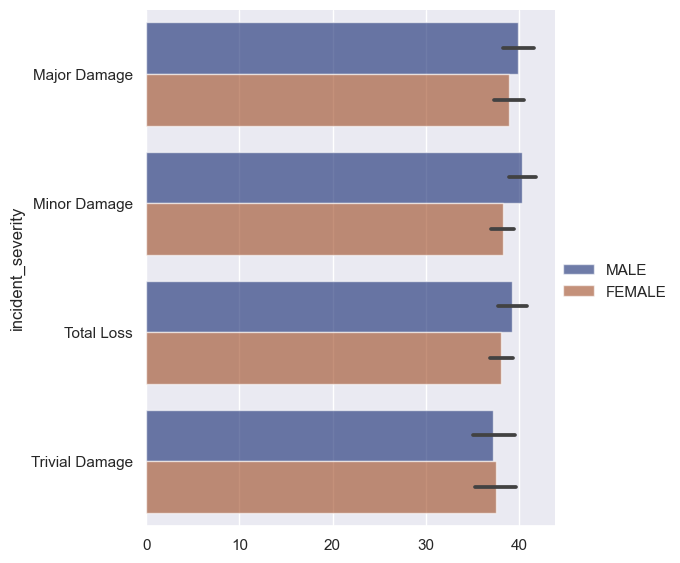

In [39]:
g = sns.catplot(
    data=df, kind="bar",
    x="age", y="incident_severity", hue="insured_sex",
     palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "incident_severity")
g.legend.set_title("")

Age group having 30 to 40 has more incident seviarity in that 
also specially male has more incident savrity as compared to male

<AxesSubplot:title={'center':'Comparision between months_as_customer and total_claim_amount'}, xlabel='months_as_customer', ylabel='total_claim_amount'>

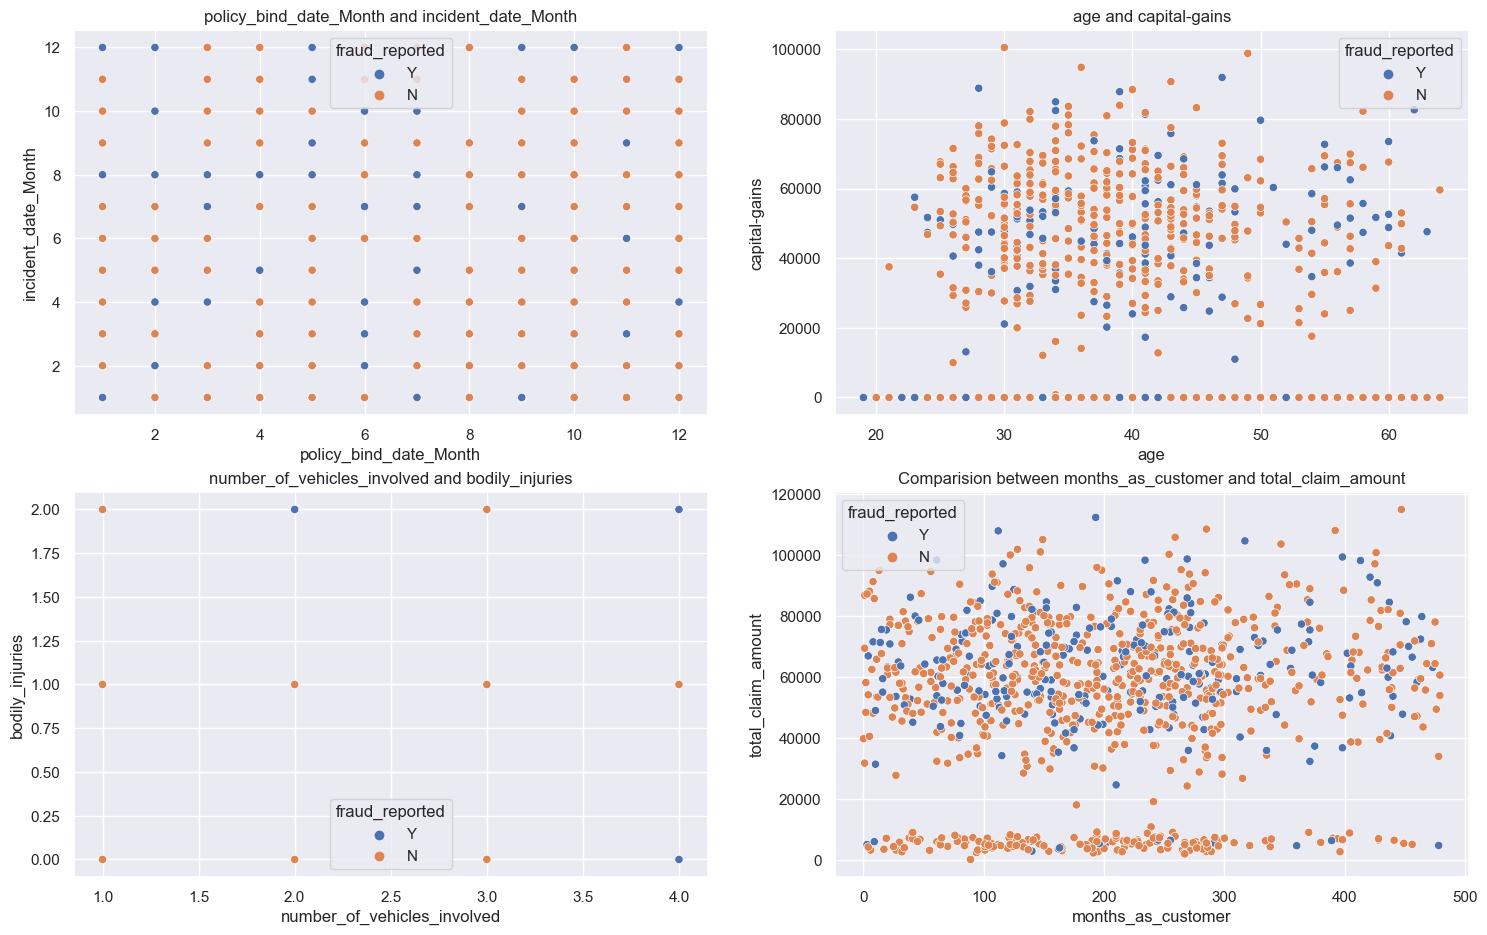

In [40]:
#Lets compare among features with hue as target column using scatter plot
plt.figure(figsize=[18,11])

plt.subplot(2,2,1)
plt.title('policy_bind_date_Month and incident_date_Month')
sns.scatterplot(df['policy_bind_date_Month'],df['incident_date_Month'],hue=df['fraud_reported']);

plt.subplot(2,2,2)
plt.title('age and capital-gains')
sns.scatterplot(df['age'],df['capital-gains'],hue=df['fraud_reported']);

plt.subplot(2,2,3)
plt.title('number_of_vehicles_involved and bodily_injuries')
sns.scatterplot(df['number_of_vehicles_involved'],df['bodily_injuries'],hue=df['fraud_reported']);

plt.subplot(2,2,4)
plt.title('Comparision between months_as_customer and total_claim_amount')
sns.scatterplot(df['months_as_customer'],df['total_claim_amount'],hue=df['fraud_reported'])

<Figure size 200x200 with 0 Axes>

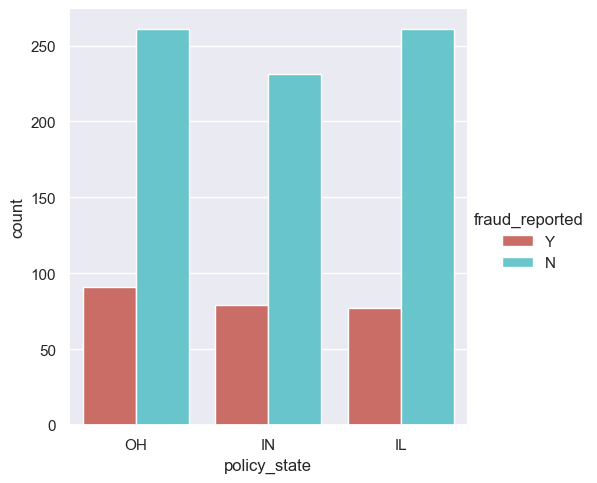

In [41]:
# lets visualize Factor plot for policy_state with hue as fraud_reported
plt.figure(figsize = (2,2))
sns.factorplot('policy_state',kind='count',data=df,hue='fraud_reported',palette="hls")
plt.xticks(rotation=0);

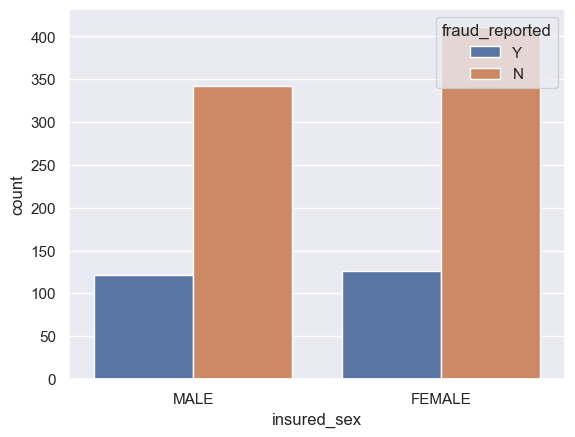

In [42]:
# lets visualize using Factor plot for insured_sex
sns.countplot(x = 'insured_sex',data=df,hue='fraud_reported')
plt.xticks(rotation=0);

In [43]:
'policy_annual_premium' ,'total_claim_amount'

('policy_annual_premium', 'total_claim_amount')

<AxesSubplot:xlabel='policy_annual_premium', ylabel='total_claim_amount'>

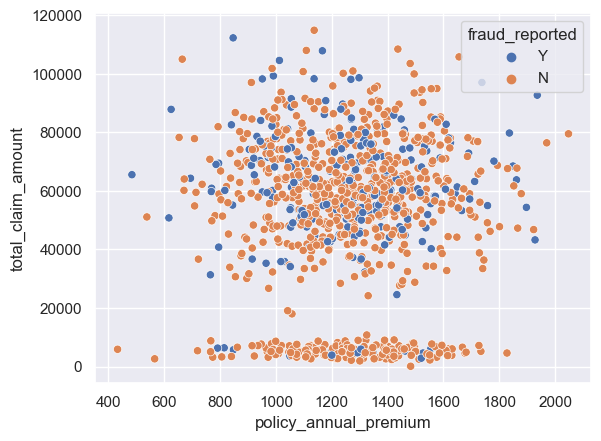

In [44]:
sns.scatterplot(df['policy_annual_premium'],df['total_claim_amount'],hue=df['fraud_reported'])

<AxesSubplot:xlabel='total_claim_amount', ylabel='count'>

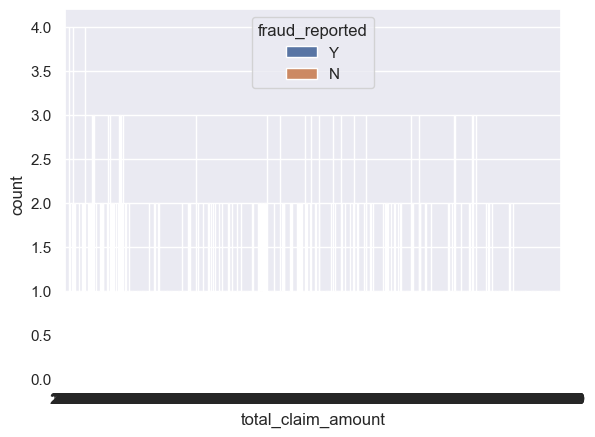

In [45]:
sns.countplot(df['total_claim_amount'],hue=df['fraud_reported'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

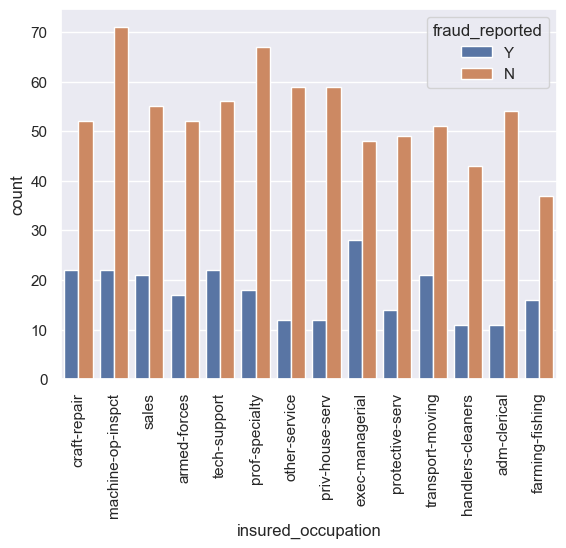

In [46]:
#lets visualize using  barplot for insured_occupation
sns.countplot('insured_occupation',data=df,hue='fraud_reported')
plt.xticks(rotation=90)

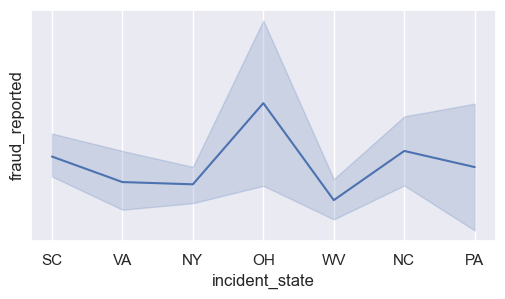

In [47]:
# Lets visualize
plt.figure(figsize=(6,3))
sns.lineplot(y="fraud_reported",x="incident_state",data=df)
plt.show()

OH state have mostly reported fraud claims followed by the NC

WV has repored least fraud claims.

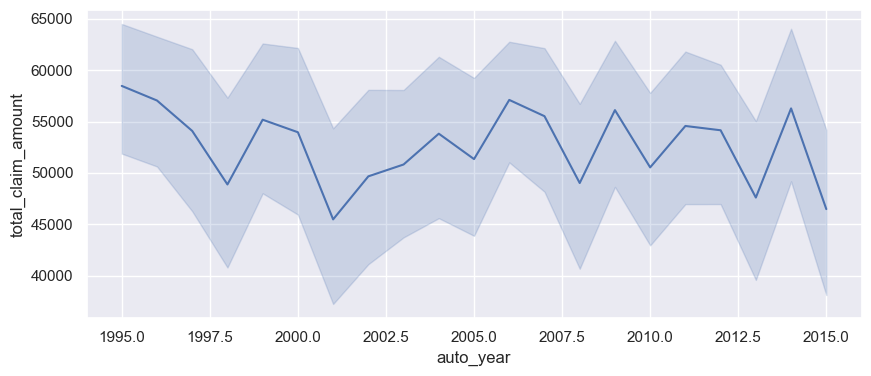

In [48]:
plt.figure(figsize=(10,4))
sns.lineplot(x="auto_year",y="total_claim_amount",data=df)
plt.show()

In the year 2015 applicant claim more amount same as in 1995.

In the year 2001 applicant claim less amount followed by the 2007.

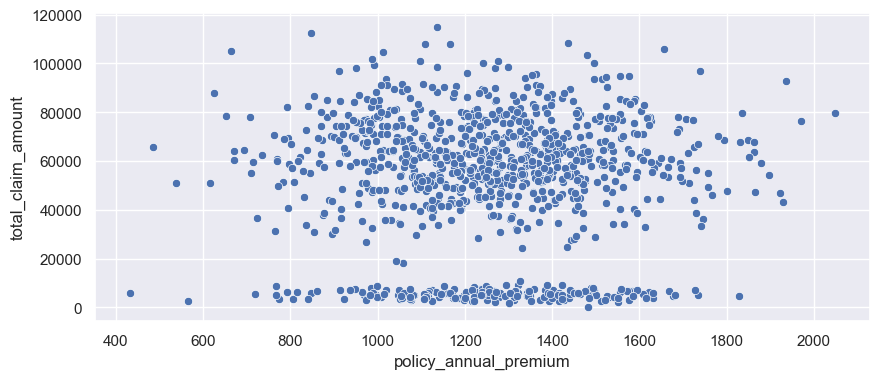

In [49]:
plt.figure(figsize=(10,4))
sns.scatterplot(x="policy_annual_premium",y="total_claim_amount",data=df)
plt.show()



We can see that most of the people pay annual premium in the range of 800 to 1600 dollor per annum.

months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'incident_date_Day', 'incident_date_Month', 'policy_bind_date_Day', 'policy_bind_date_Month', 'policy_bind_date_Year

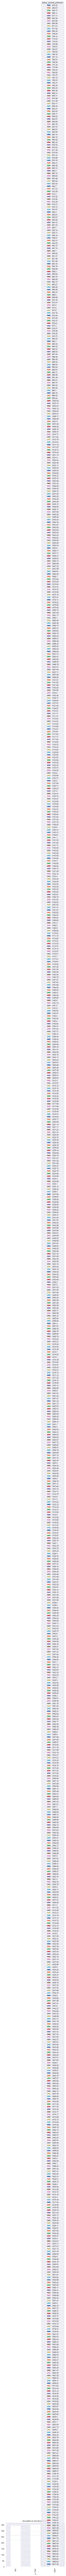

In [50]:
a_p = pd.crosstab(df['policy_deductable'],df['policy_annual_premium'])
a_P = a_p.div(a_p.sum(1).astype(float), axis=0)
a_p.plot(kind = 'bar', title = 'duucable as annual premium',stacked=True, grid = True)
plt.xlabel('a')
plt.show()

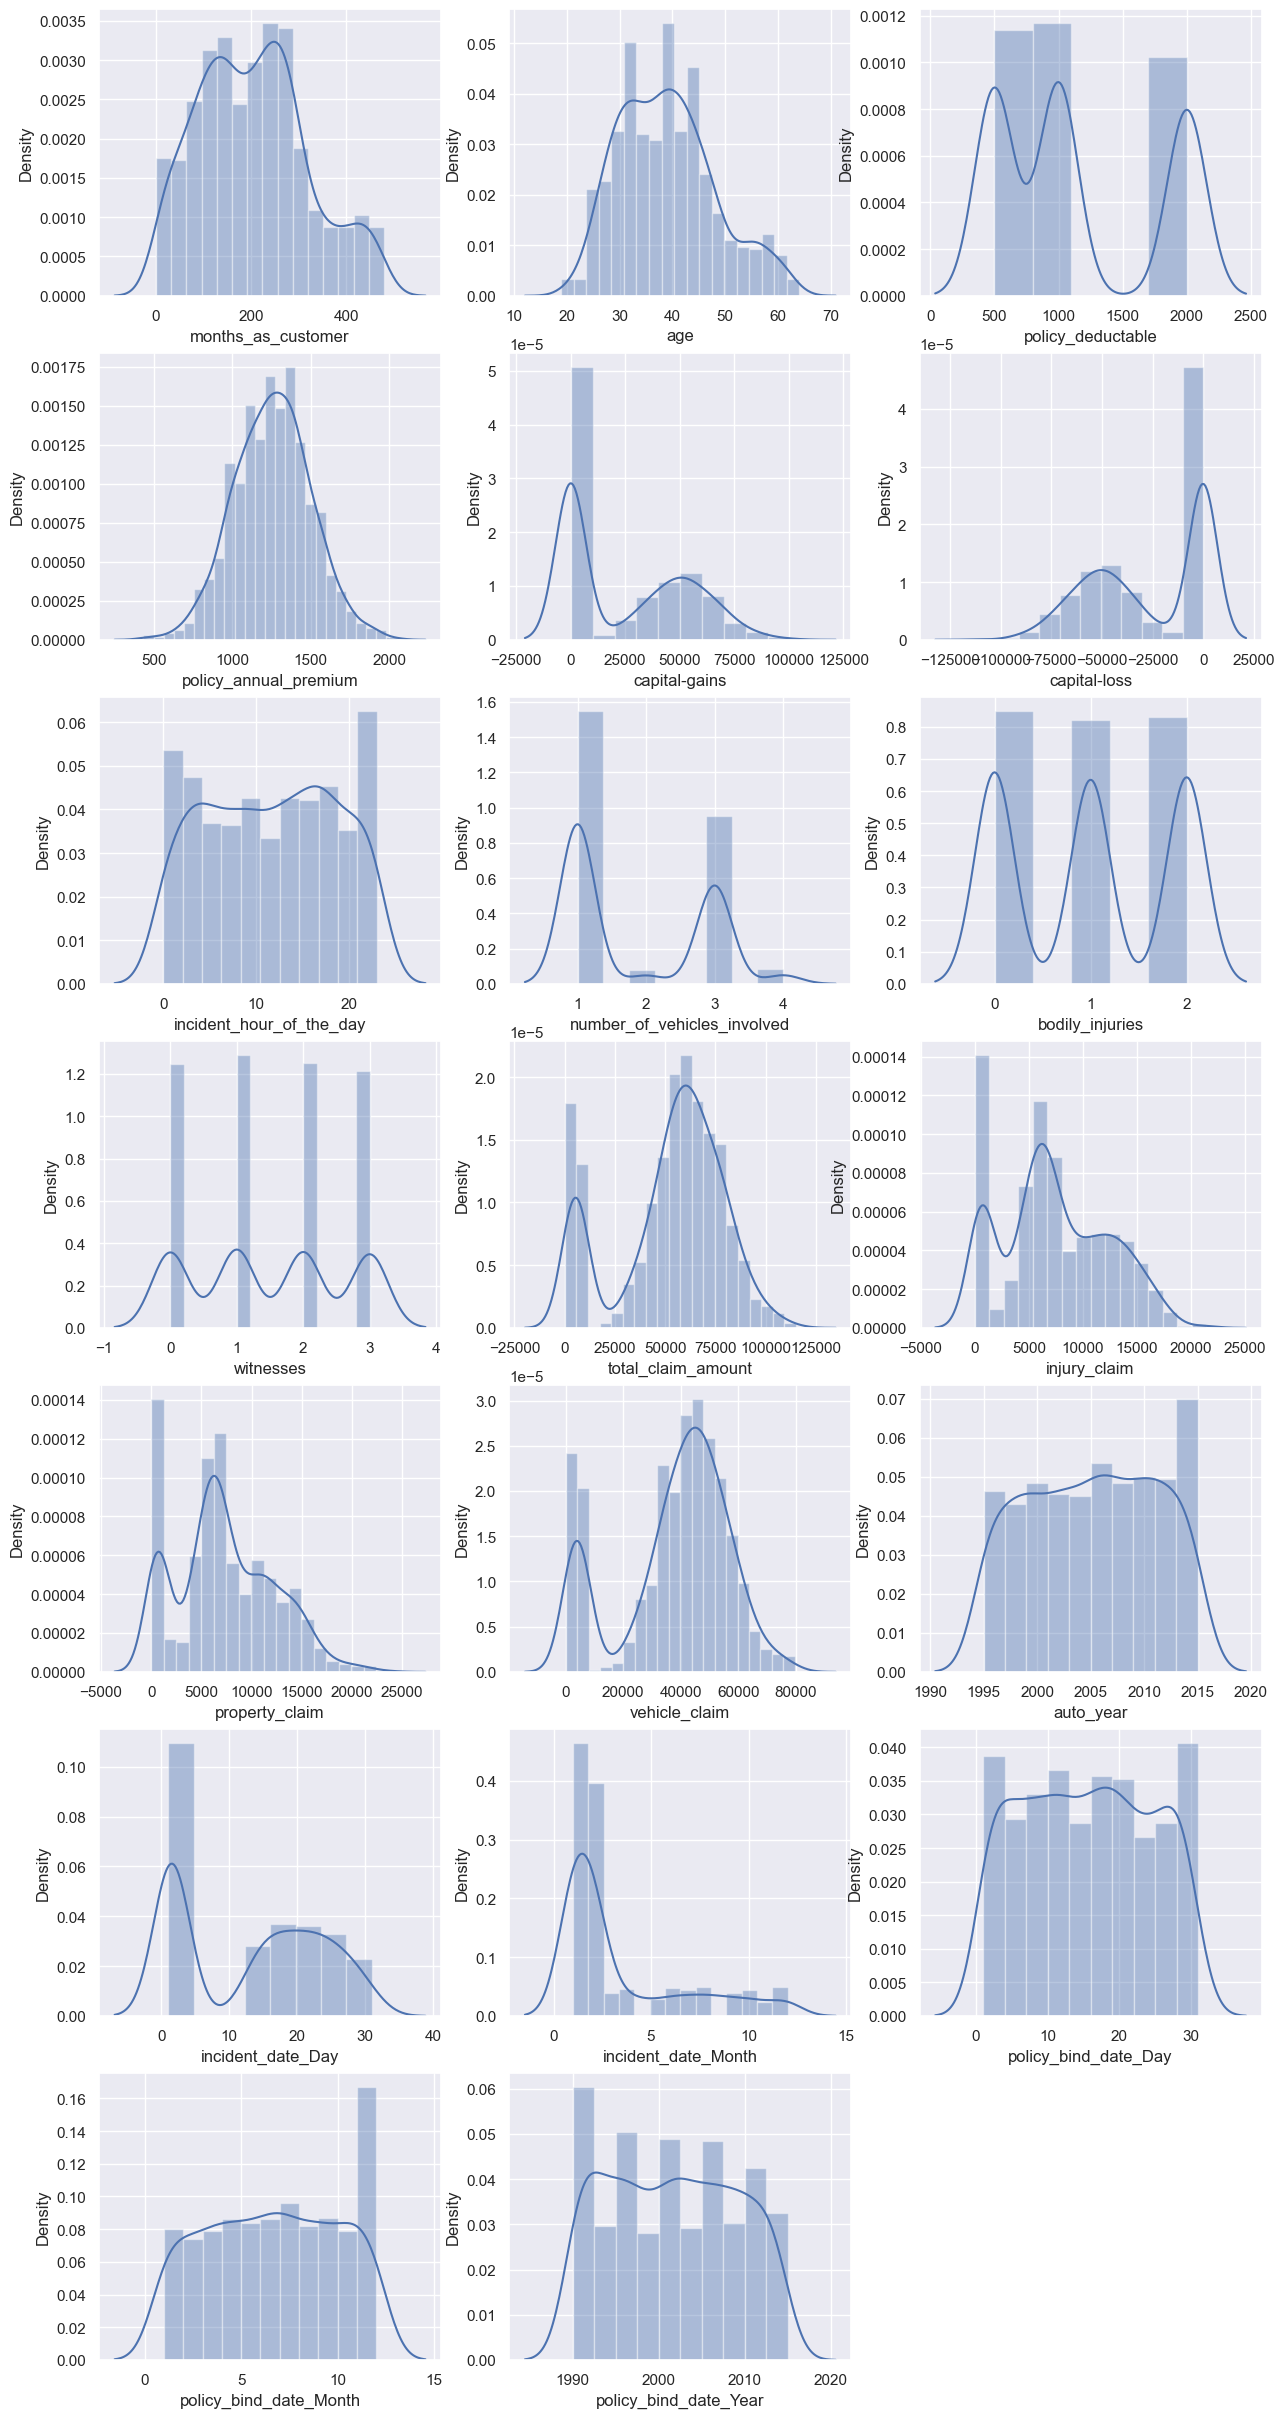

In [51]:
plt.figure(figsize = (15,35))
p=1

for i in integer:
    if p <= 24:
        ax= plt.subplot(8,3,p)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize = 12)
        
    p +=1
plt.show()

Here we can see that few columns are skewed towards left. we have to manage our skewness on later stage.

policy_deductable, capital-gains, capital-loss, number_of_vehicles_involved, bodily_injuries, witnesses, total_claim_amount, injury_claim, property_claim, vehicle_claim, incident_month and incident_day

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>,
        <AxesSubplot:title={'center':'policy_annual_premium'}>],
       [<AxesSubplot:title={'center':'capital-gains'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_hour_of_the_day'}>,
        <AxesSubplot:title={'center':'number_of_vehicles_involved'}>],
       [<AxesSubplot:title={'center':'bodily_injuries'}>,
        <AxesSubplot:title={'center':'witnesses'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'injury_claim'}>],
       [<AxesSubplot:title={'center':'property_claim'}>,
        <AxesSubplot:title={'center':'vehicle_claim'}>,
        <AxesSubplot:title={'center':'auto_year'}>,
        <AxesSubplot:title={'center':'incident_date_Day'}>],
       [<AxesSubplot:title={'center':'incident_date_Month'}>,
    

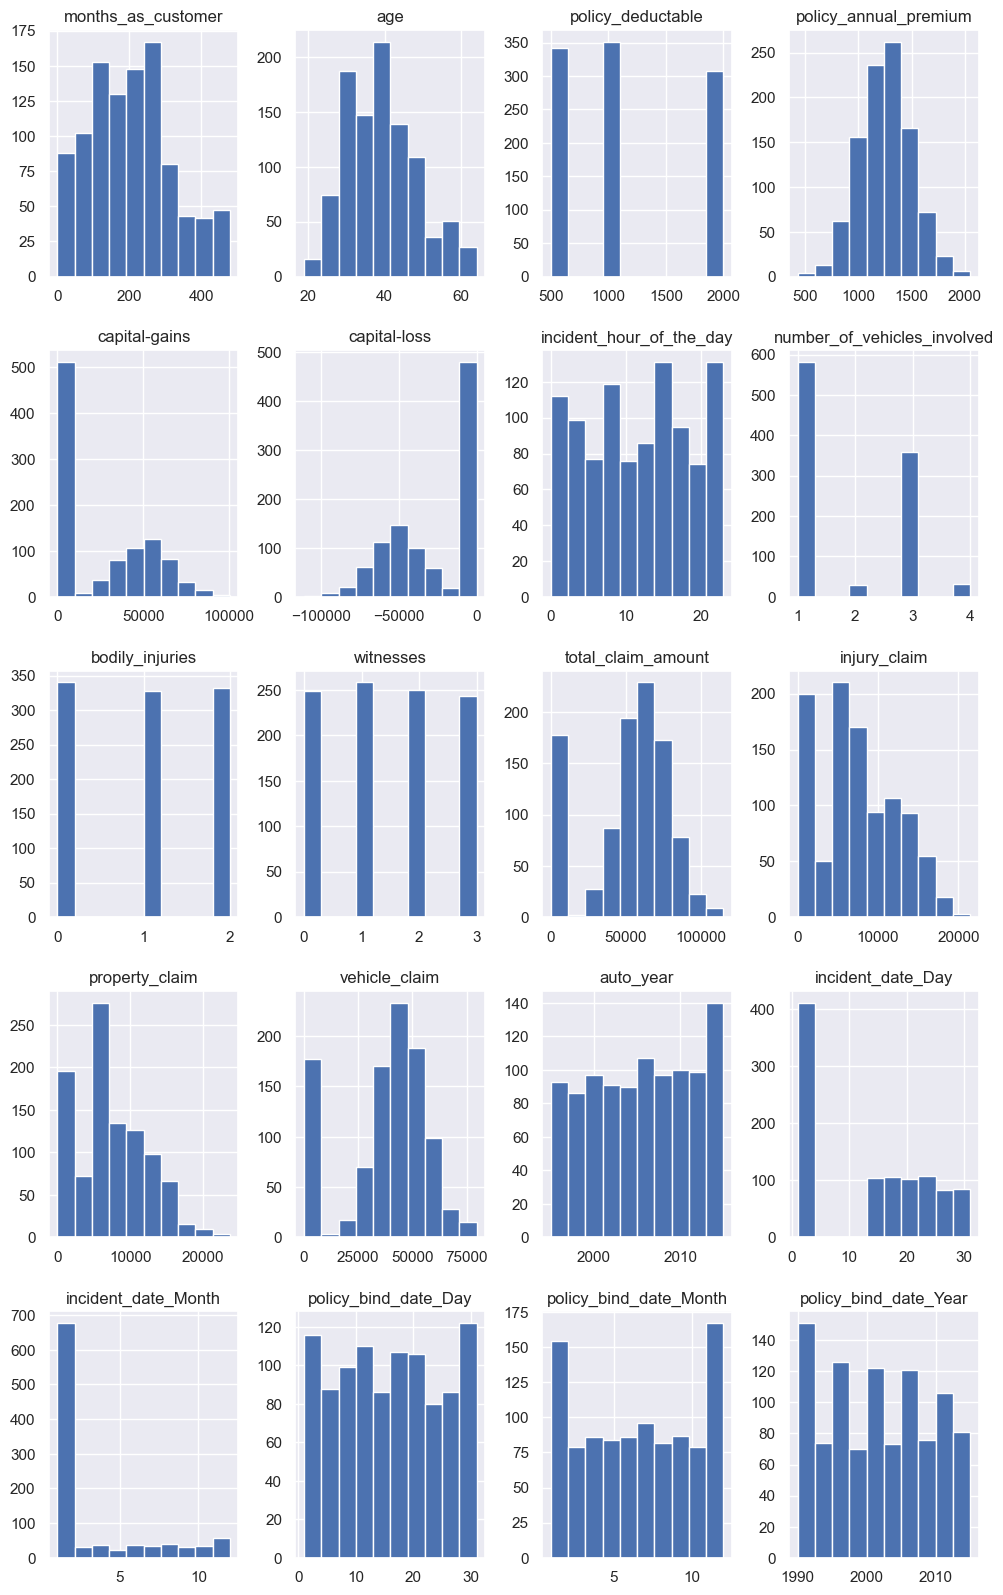

In [52]:
df.hist(figsize = (12,24),layout = (6,4), sharex = False)



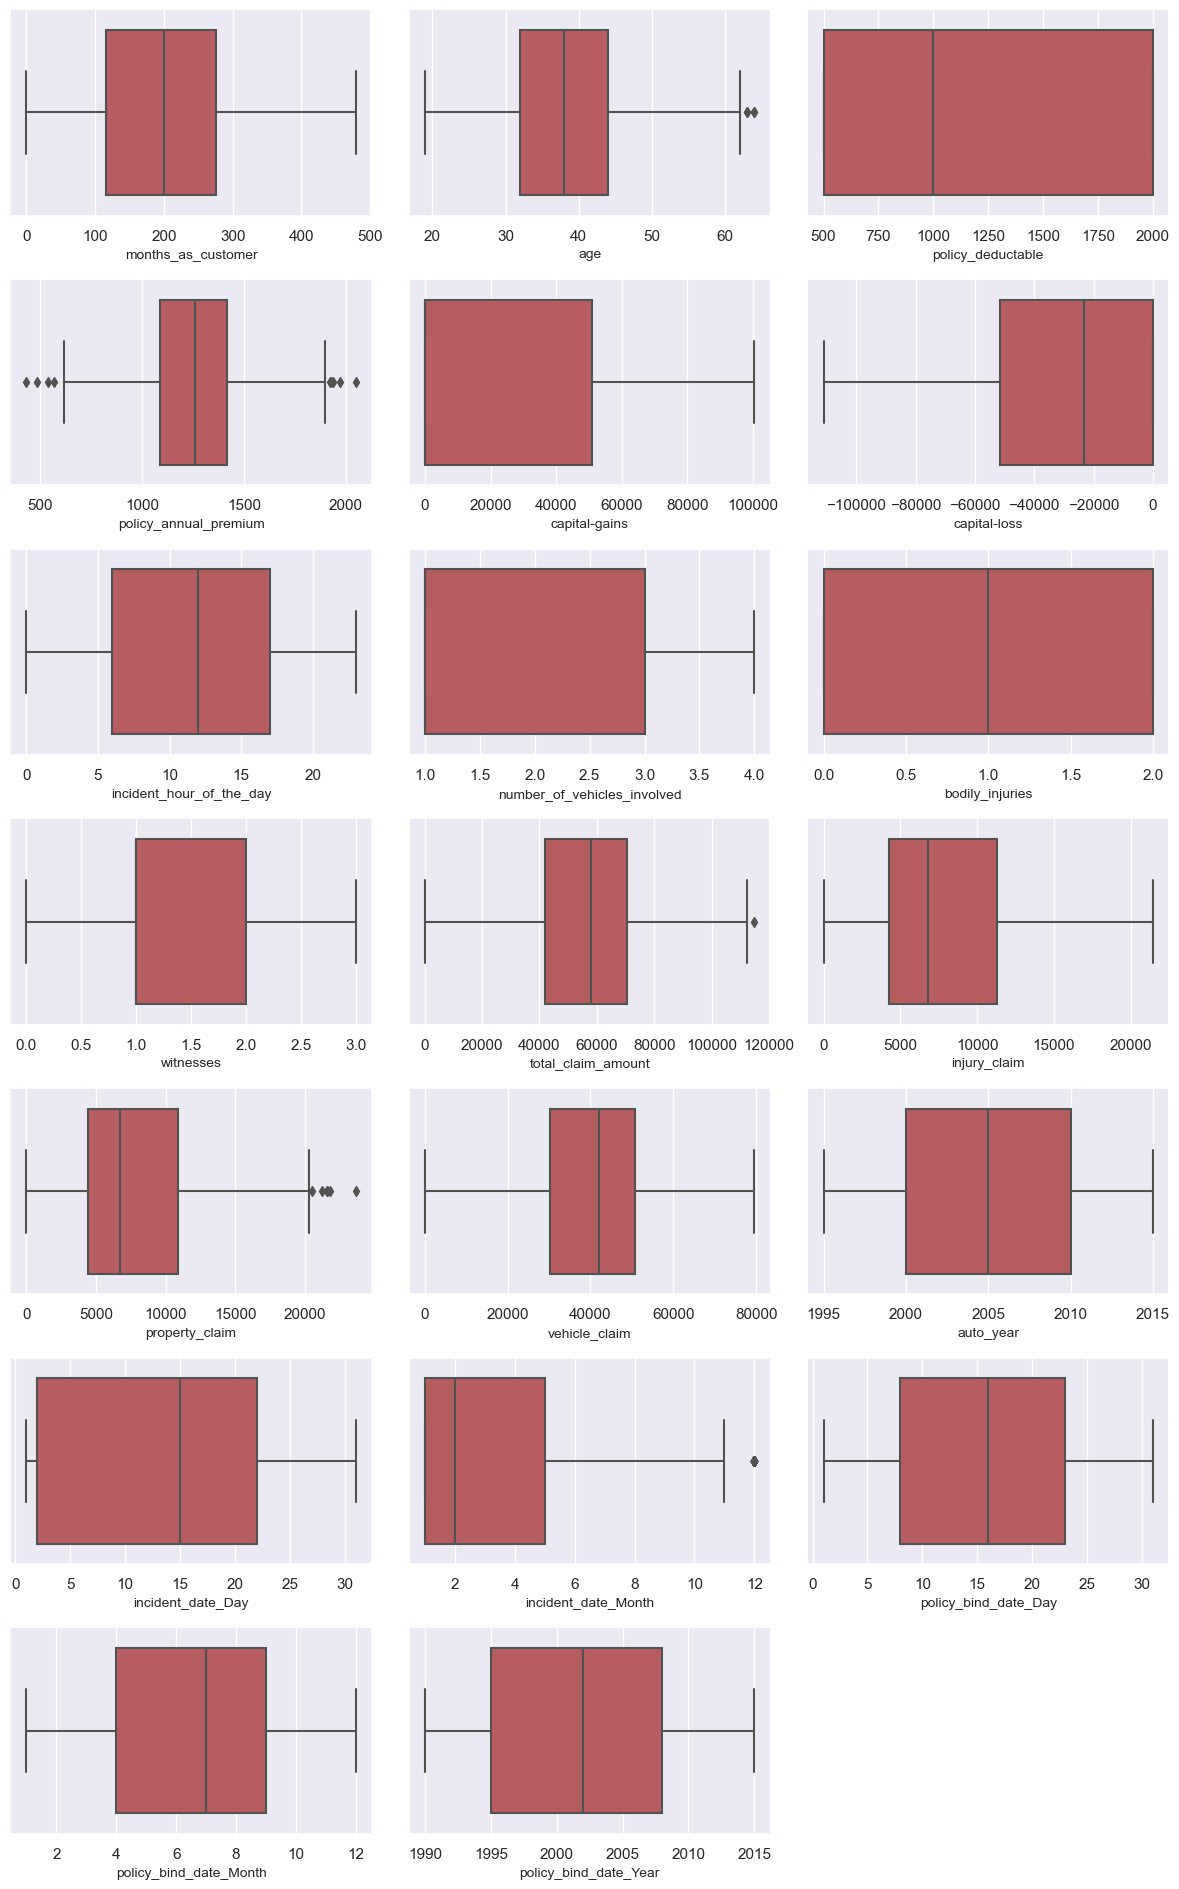

In [53]:
plt.figure(figsize = (12,24))
p=1

for i in integer:
    if p <= 36:
        plt.subplot(9,3, p)
        sns.boxplot(df[i], color = 'r')
        plt.xlabel(i, fontsize = 10)
        
    p +=1 
plt.tight_layout()  

we observe from the garph only few columns have present outliers in the dataframe:-
only following columns has present the outliers'
    
1.age

2.Property clain

3.Policy Annnual Premium

4.Total_claim_amount

5.incident_mont

# ZScore method :

In [54]:
# lets make a list of columns with outliers.
feature =df[['age','policy_annual_premium','total_claim_amount','property_claim','incident_date_Month']]

In [55]:
from scipy.stats import zscore
z = np.abs(zscore(feature))  # lets use zscore to remove outliers from the dataset
df1 = df[(z<3).all(axis = 1)]
df1

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium insured_sex insured_education_level  \
0                  1406.91        MALE                      MD   
1                  1197.22        MALE                      MD   
2                  1413.14      FEMALE                     PhD   
3                  1415.74      FEMALE                     PhD   
4                  1583.91        MALE               Associate   
..                     ...         ...                     ...   
995                1310.80      FEMALE                 Masters   
996                1436.79      FEMALE                     PhD   
997                1383.49      FEMALE                 Masters   
998                1356.92        MALE               Associate   
999                 766.19      FEMALE               Associate   

    insured_occupation insured_hobbies  ... vehicle_claim   auto_make  \
0         craft-repair        sleeping  ...         52080        Saab   
1    machine-op-inspct         reading  ...          3510    Mercedes   
2                sales     board-games  ...         23100       Dodge   
3         armed-forces     board-games  ...         50720   Chevrolet   
4                sales     board-games  ...          4550      Accura   
..                 ...             ...  ...           ...         ...   
995       craft-repair       paintball  ...         61040       Honda   
996     prof-specialty        sleeping  ...         72320  Volkswagen   
997       armed-forces  bungie-jumping  ...         52500      Suburu   
998  handlers-cleaners    base-jumping  ...         36540        Audi   
999              sales        kayaking  ...          3680    Mercedes   

     auto_model auto_year fraud_reported incident_date_Day  \
0           92x      2004              Y                25   
1          E400      2007              Y                21   
2           RAM      2007              N                22   
3         Tahoe      2014              Y                 1   
4           RSX      2009              N                17   
..          ...       ...            ...               ...   
995      Accord      2006              N                22   
996      Passat      2015              N                24   
997     Impreza      1996              N                23   
998          A5      1998              N                26   
999        E400      2007              N                26   

    incident_date_Month policy_bind_date_Day policy_bind_date_Month  \
0                     1                   17                     10   
1                     1                   27                      6   
2                     2                    9                      6   
3                    10                   25                      5   
4                     2                    6                      6   
..                  ...                  ...                    ...   
995                   2                   16                      7   
996                   1                    1                      5   
997                   1                   17      

In [56]:
print(df.shape)
print(df1.shape)

(1000, 38)
(996, 38)


In [57]:
# lets check the dataloss using zscore method
loss=(((df.shape[0]-df1.shape[0])/df.shape[0])*100)
loss

0.4

The total data loss after using Zscore is only 0.4%

# 2. Inter Quantile Range

In [58]:
Q1 = feature.quantile(0.25)
Q3 = feature.quantile(0.75)
IQR = Q3-Q1
df2 =   df[~((df<(Q1-1.5*IQR))|(df>(Q3 + 1.5*IQR))).any(axis=1)]

In [59]:
print(df.shape)
print(df2.shape)

(1000, 38)
(942, 38)


In [60]:
# lets check the dataloss using zscore method
loss=(((df.shape[0]-df2.shape[0])/df.shape[0])*100)
loss

5.800000000000001

we have observe from the result we have only 5.8% dataloass which is acceptable.

# Skewness

In [61]:
df2.skew()

months_as_customer             0.345945
age                            0.446346
policy_deductable              0.466807
policy_annual_premium          0.005067
capital-gains                  0.461870
capital-loss                  -0.378917
incident_hour_of_the_day      -0.033082
number_of_vehicles_involved    0.513867
bodily_injuries                0.015747
witnesses                      0.023496
total_claim_amount            -0.611519
injury_claim                   0.270153
property_claim                 0.293688
vehicle_claim                 -0.624344
auto_year                     -0.047164
incident_date_Day             -0.016124
incident_date_Month            1.445659
policy_bind_date_Day           0.036075
policy_bind_date_Month        -0.030920
policy_bind_date_Year          0.054471
dtype: float64

Only vehicle claim Incident date month and total claim amount range is above 0.5

In [62]:
# lets create list of columns which has skewness present
f=["total_claim_amount","vehicle_claim", "incident_date_Month"]

In [63]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')

df2[f]=scaler.fit_transform(df2[f].values)

In [64]:
# lets check the skewness again
df2[f].skew()

total_claim_amount    -0.522235
vehicle_claim         -0.529147
incident_date_Month    0.306751
dtype: float64

Here we can see that skewness in all columns have been reduced. its almost like normal now

# Encoding the Data

In [65]:
# lets import the required library for encoding
from sklearn.preprocessing import LabelEncoder
# lets encode the categorical column using LabelEncoder
le=LabelEncoder()
df2=df2.apply(le.fit_transform)
df2.head()

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 295   29             2           1                  1   
1                 209   23             1           1                  2   
2                 120   10             2           0                  2   
3                 236   22             0           1                  2   
4                 209   25             0           2                  1   

   policy_annual_premium  insured_sex  insured_education_level  \
0                    688            1                        4   
1                    370            1                        4   
2                    696            0                        6   
3                    698            0                        6   
4                    851            1                        0   

   insured_occupation  insured_hobbies  ...  vehicle_claim  auto_make  \
0                   2               17  ...            522         10   
1                   6               15  ...             37          8   
2                  11                2  ...            114          4   
3                   1                2  ...            500          3   
4                  11                2  ...             65          0   

   auto_model  auto_year  fraud_reported  incident_date_Day  \
0           1          9               1                 15   
1          12         12               1                 11   
2          30         12               0                 12   
3          34         19               1                  0   
4          31         14               0                  7   

   incident_date_Month  policy_bind_date_Day  policy_bind_date_Month  \
0                    0                    16                       9   
1                    0                    26                       5   
2                    1                     8                       5   
3                    9                    24                       4   
4                    1                     5                       5   

   policy_bind_date_Year  
0                     24  
1                     16  
2                     10  
3                      0  
4                     24  

[5 rows x 38 columns]

In [66]:
cor = df.corr()
cor

months_as_customer       age  policy_deductable  \
months_as_customer                     1.000000  0.922098           0.026807   
age                                    0.922098  1.000000           0.029188   
policy_deductable                      0.026807  0.029188           1.000000   
policy_annual_premium                  0.005018  0.014404          -0.003245   
capital-gains                          0.006399 -0.007075           0.035212   
capital-loss                           0.020209  0.007368          -0.023544   
incident_hour_of_the_day               0.070639  0.087161           0.060935   
number_of_vehicles_involved            0.014736  0.022102           0.051214   
bodily_injuries                       -0.010162 -0.015679          -0.022765   
witnesses                              0.058383  0.052359           0.066639   
total_claim_amount                     0.062108  0.069863           0.022839   
injury_claim                           0.065329  0.075522           0.039107   
property_claim                         0.034940  0.060898           0.064792   
vehicle_claim                          0.061013  0.062588           0.005269   
auto_year                             -0.000292  0.001354           0.026105   
incident_date_Day                     -0.011092 -0.006131          -0.018160   
incident_date_Month                    0.024659  0.023404          -0.006418   
policy_bind_date_Day                   0.051728  0.053869           0.009164   
policy_bind_date_Month                 0.005750  0.015501          -0.050416   
policy_bind_date_Year                 -0.048276 -0.037444          -0.049598   

                             policy_annual_premium  capital-gains  \
months_as_customer                        0.005018       0.006399   
age                                       0.014404      -0.007075   
policy_deductable                        -0.003245       0.035212   
policy_annual_premium                     1.000000      -0.013738   
capital-gains                            -0.013738       1.000000   
capital-loss                              0.023547      -0.046904   
incident_hour_of_the_day                 -0.001578      -0.016406   
number_of_vehicles_involved              -0.045991       0.061643   
bodily_injuries                           0.026780       0.055829   
witnesses                                 0.002332      -0.017651   
total_claim_amount                        0.009094       0.015980   
injury_claim                             -0.017633       0.025934   
property_claim                           -0.011654      -0.000779   
vehicle_claim                             0.020246       0.015836   
auto_year                                -0.049226       0.031398   
incident_date_Day                         0.014835       0.015418   
incident_date_Month                       0.021559       0.029409   
policy_bind_date_Day                     -0.025183       0.007994   
policy_bind_date_Month                   -0.035355      -0.011102   
policy_bind_date_Year                     0.001249       0.041249   

                             capital-loss  incident_hour_of_the_day  \
months_as_customer               0.020209                  0.070639   
age                              0.007368                  0.087161   
policy_deductable               -0.023544                  0.060935   
policy_annual_premium            0.023547                 -0.001578   
capital-gains                   -0.046904                 -0.016406   
capital-loss                     1.000000                 -0.025054   
incident_hour_of_the_day        -0.025054                  1.000000   
number_of_vehicles_involved     -0.014895                  0.120794   
bodily_injuries                 -0.024418                 -0.034563   
witnesses                       -0.041330                  0.006527   
total_claim_amount              -0.036060                  0.217702   
injury_claim                    -0.046060     

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5]),
 [Text(0, 0.5, 'months_as_customer'),
  Text(0, 1.5, 'age'),
  Text(0, 2.5, 'policy_state'),
  Text(0, 3.5, 'policy_csl'),
  Text(0, 4.5, 'policy_deductable'),
  Text(0, 5.5, 'policy_annual_premium'),
  Text(0, 6.5, 'insured_sex'),
  Text(0, 7.5, 'insured_education_level'),
  Text(0, 8.5, 'insured_occupation'),
  Text(0, 9.5, 'insured_hobbies'),
  Text(0, 10.5, 'insured_relationship'),
  Text(0, 11.5, 'capital-gains'),
  Text(0, 12.5, 'capital-loss'),
  Text(0, 13.5, 'incident_type'),
  Text(0, 14.5, 'collision_type'),
  Text(0, 15.5, 'incident_severity'),
  Text(0, 16.5, 'authorities_contacted'),
  Text(0, 17.5, 'incident_state'),
  Text(0, 18.5, 'incident_city'),
  Text(0, 19.5, 'incident_hour_of_the_day'),
  Text(0, 20.5, 'nu

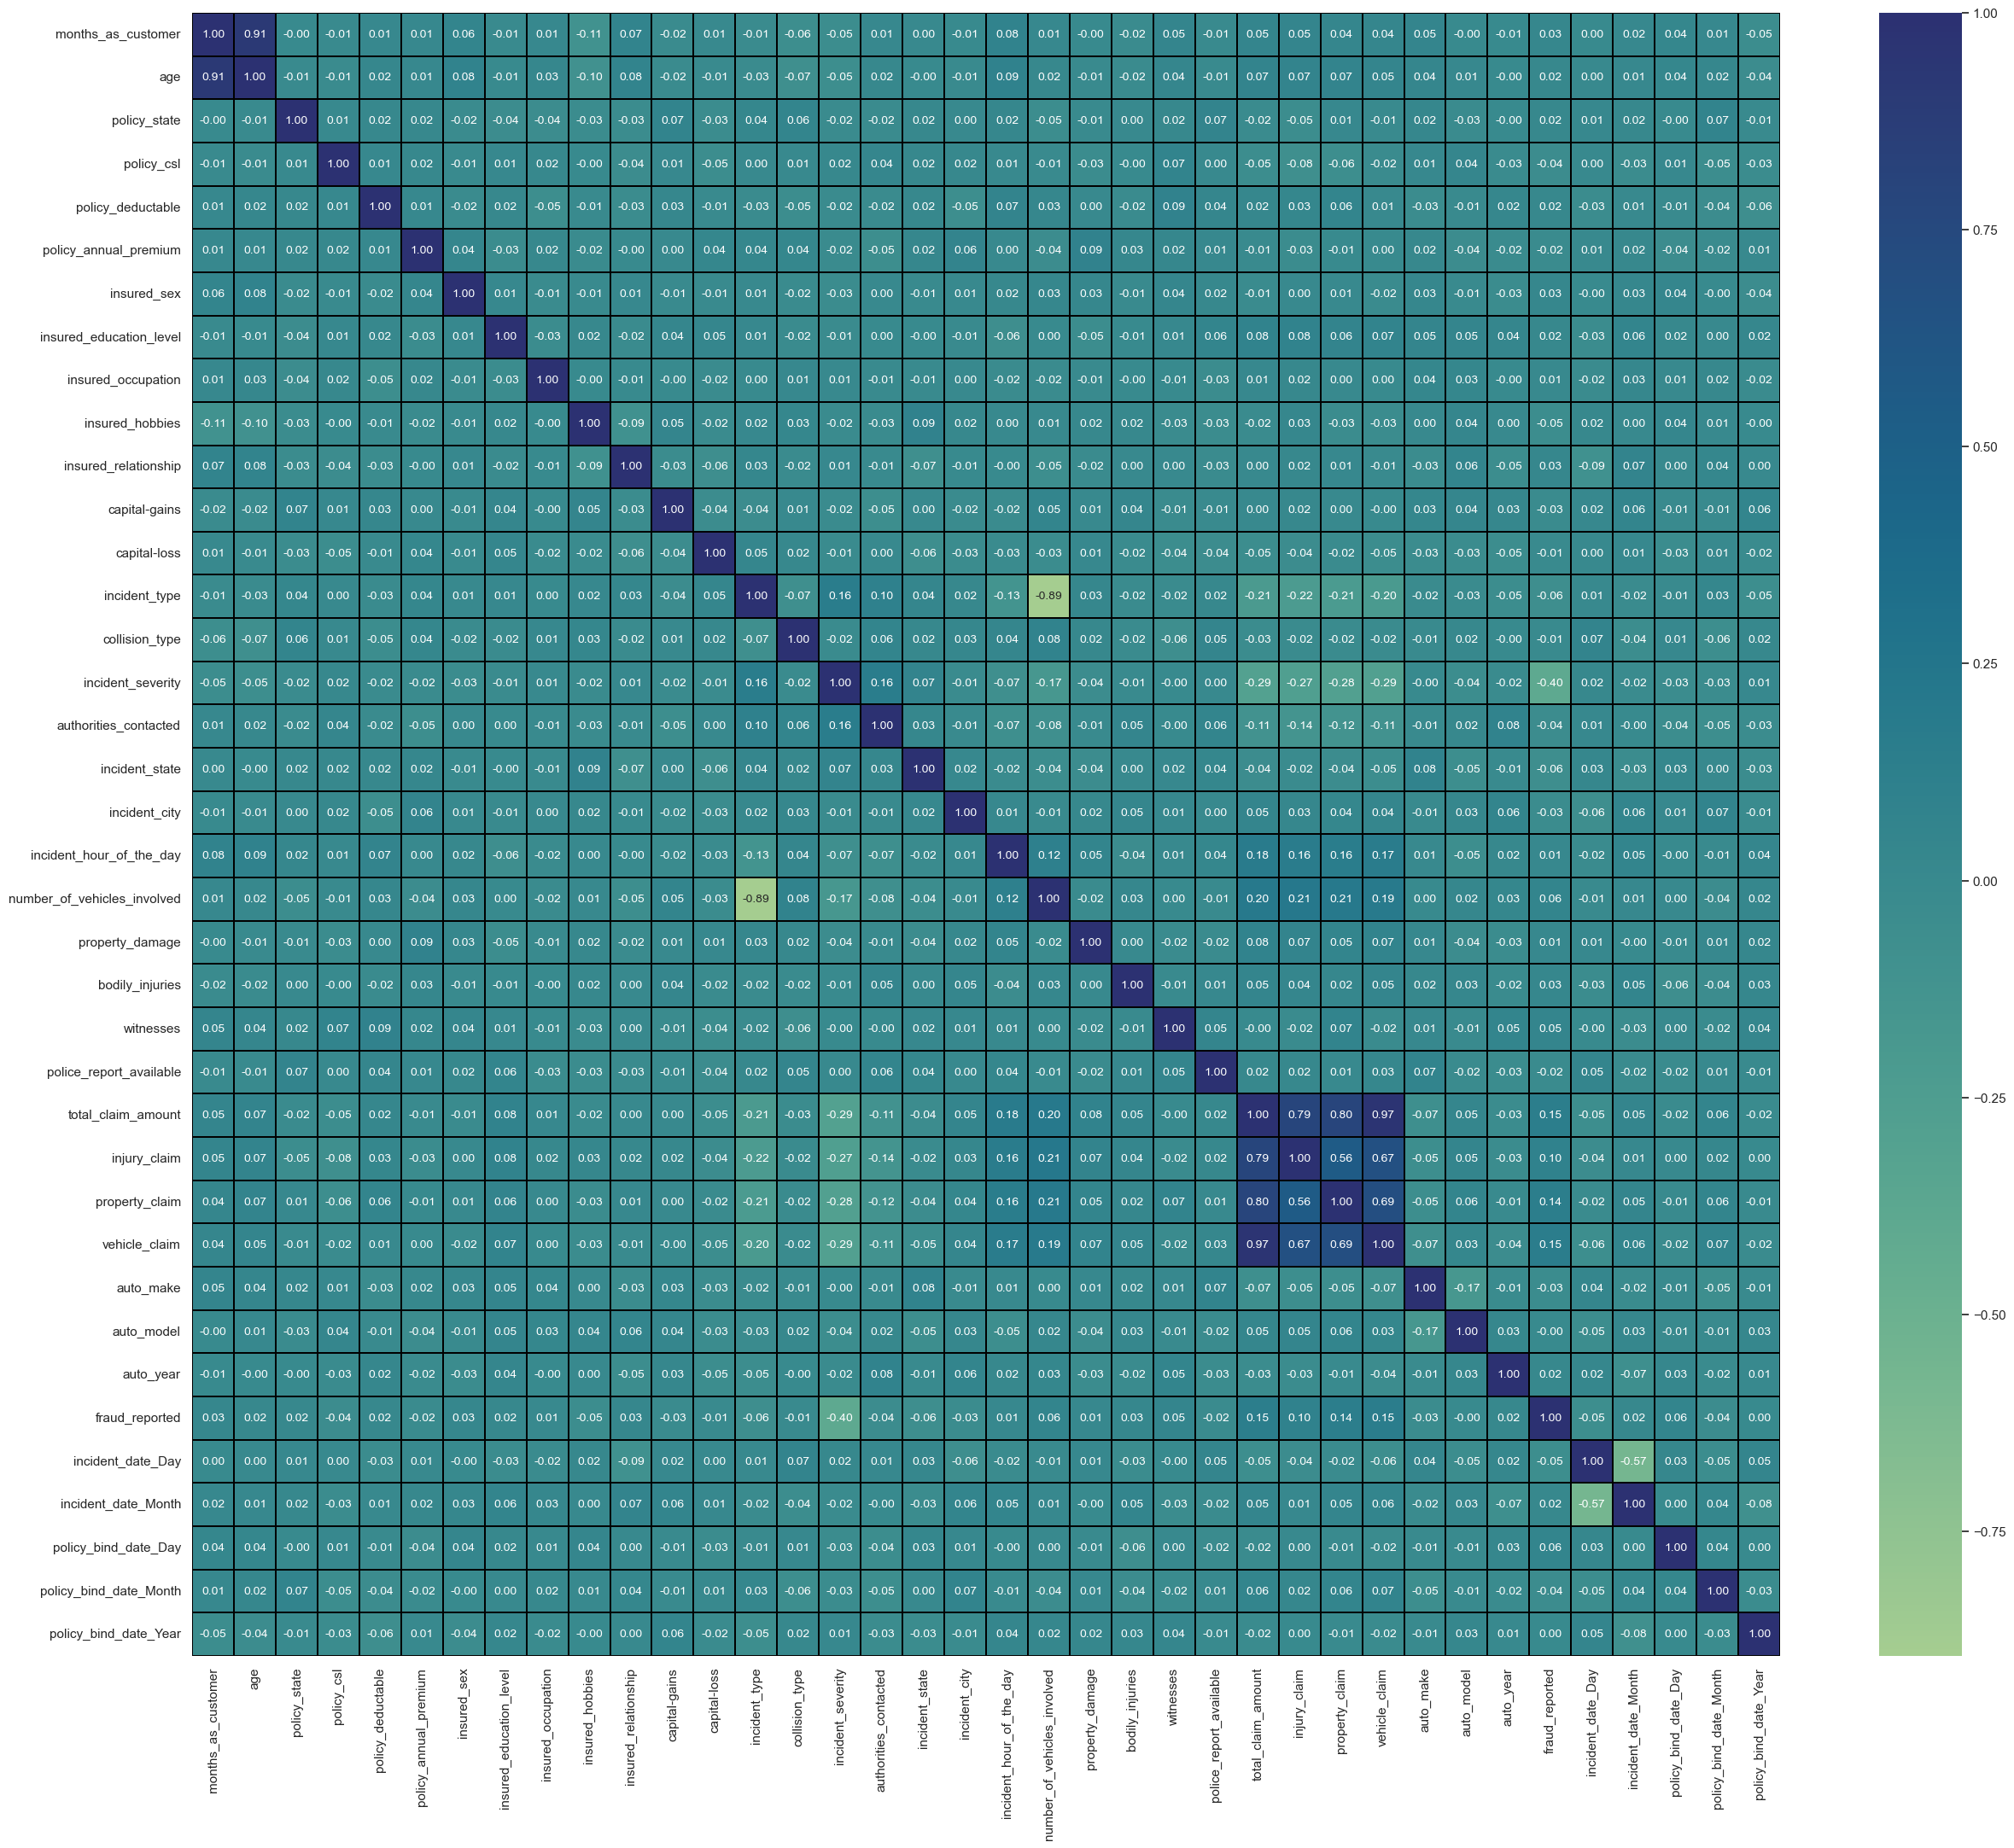

In [67]:
# lets check Correlation using heatmap.
plt.figure(figsize=(30,25))
sns.heatmap(df2.corr(),linewidths=.1, fmt='.2f', annot = True, linecolor="black",annot_kws={'size':10},cmap="crest")
plt.yticks(rotation=0)

Here we can observe multicolinearity issue between incident type and number_of_vehicles_invovled.

There is multicolinearity issue between incident_month and incident_day.

There is multicolinearity issue between total_claim_amount and injury_claim.

There is multicolinearity issue between total_claim_amount and property_claim.

There is multicolinearity issue between injury_claim and vehicle_claim.

There is multicolinearity issue between total_claim_amount and vehicle_claim.

There is multicolinearity issue between vehicle_claim and property_claim.

There is multicolinearity issue between total_claim_amount and property_claim

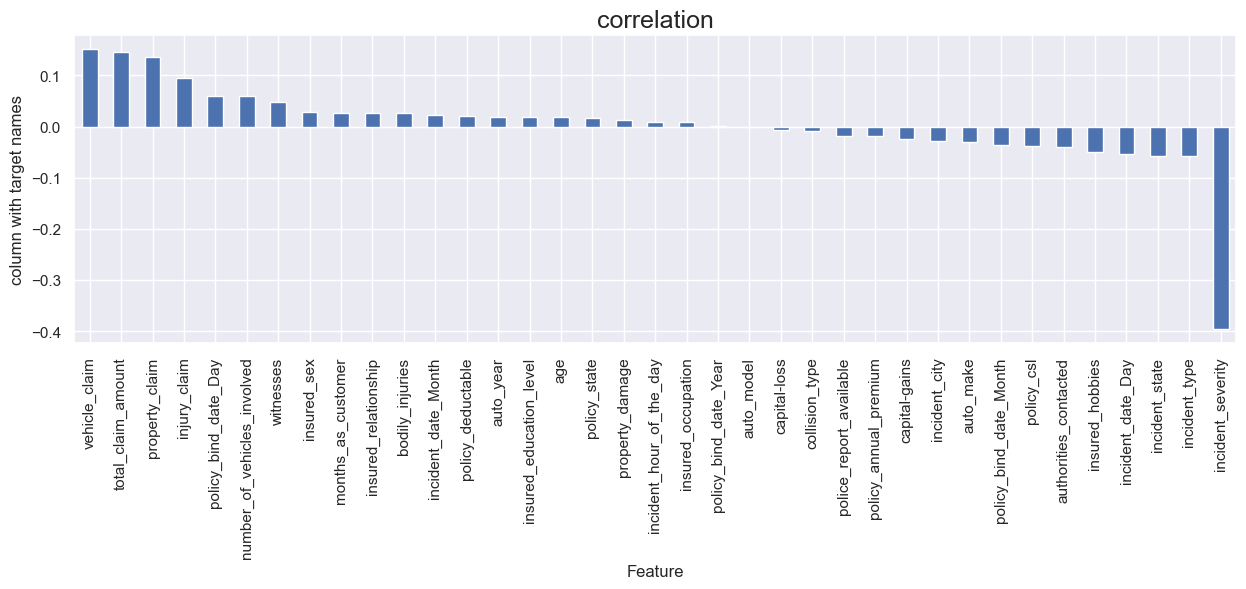

In [68]:
plt.figure(figsize=(15,4))
df2.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('column with target names')
plt.title('correlation',fontsize=18)
plt.show()

Here we can observe that , vehicle claim and incident_saverity has more coralted to the target variable.

Also total claim amount,property claim , injury claim, and incident type has also co related with the target variable.

Here we can observe that the column policy_bind_year is least correlated with target variable.

Here we acinsured_occupation and auto_model are less correlated with target column.

Here we can auto_age and incident_hour_of_the_day also less correlated with target

# Lets separate features and target column

In [69]:
# lets assign features to x and target to y
x=df2.drop('fraud_reported', axis=1)
y=df2['fraud_reported']

# feature scaling using standard scalurization

In [70]:
# lets import required library for the same
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [71]:
x.head()

months_as_customer       age  policy_state  policy_csl  policy_deductable  \
0            1.170914  1.019050      1.186970    0.072568           0.031781   
1            0.287692  0.351107     -0.021815    0.072568           1.279189   
2           -0.626341 -1.096102      1.186970   -1.170330           1.279189   
3            0.564982  0.239783     -1.230599    0.072568           1.279189   
4            0.287692  0.573755     -1.230599    1.315467           0.031781   

   policy_annual_premium  insured_sex  insured_education_level  \
0               0.822622     1.077288                 0.536898   
1              -0.359556     1.077288                 0.536898   
2               0.852363    -0.928256                 1.563818   
3               0.859798    -0.928256                 1.563818   
4               1.428582     1.077288                -1.516942   

   insured_occupation  insured_hobbies  ...  property_claim  vehicle_claim  \
0           -1.166367         1.313950  ...        1.254220       0.950239   
1           -0.170249         0.957252  ...       -1.327257      -1.480165   
2            1.074897        -1.361282  ...       -1.000995      -1.094307   
3           -1.415396        -1.361282  ...       -0.199650       0.839994   
4            1.074897        -1.361282  ...       -1.378772      -1.339853   

   auto_make  auto_model  auto_year  incident_date_Day  incident_date_Month  \
0   0.842022   -1.636061  -0.180440           1.205927            -0.726308   
1   0.346436   -0.651460   0.317532           0.599179            -0.726308   
2  -0.644734    0.959706   0.317532           0.750866            -0.373819   
3  -0.892527    1.317743   1.479465          -1.069376             2.446099   
4  -1.635905    1.049215   0.649513          -0.007568            -0.373819   

   policy_bind_date_Day  policy_bind_date_Month  policy_bind_date_Year  
0              0.178344                1.012391               1.695275  
1              1.308135               -0.169359               0.601193  
2             -0.725489               -0.169359              -0.219368  
3              1.082177               -0.464796              -1.586970  
4             -1.064426               -0.169359               1.695275  

[5 rows x 37 columns]

# Varaince Inflation factor

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif_value'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif

vif_value                     features
0    6.059679           months_as_customer
1    6.114312                          age
2    1.039210                 policy_state
3    1.033771                   policy_csl
4    1.043107            policy_deductable
5    1.034284        policy_annual_premium
6    1.030378                  insured_sex
7    1.047931      insured_education_level
8    1.020054           insured_occupation
9    1.049956              insured_hobbies
10   1.052954         insured_relationship
11   1.038473                capital-gains
12   1.039305                 capital-loss
13   5.196080                incident_type
14   1.050803               collision_type
15   1.179355            incident_severity
16   1.101602        authorities_contacted
17   1.042111               incident_state
18   1.033983                incident_city
19   1.094553     incident_hour_of_the_day
20   5.134048  number_of_vehicles_involved
21   1.032655              property_damage
22   1.026584              bodily_injuries
23   1.051575                    witnesses
24   1.040811      police_report_available
25  97.956653           total_claim_amount
26   6.630196                 injury_claim
27   6.517874               property_claim
28  48.182905                vehicle_claim
29   1.071667                    auto_make
30   1.066488                   auto_model
31   1.046309                    auto_year
32   1.532071            incident_date_Day
33   1.554676          incident_date_Month
34   1.023475         policy_bind_date_Day
35   1.044031       policy_bind_date_Month
36   1.040011        policy_bind_date_Year

here we can observe that total_claim amount and vehicle claim is the above the standard value which is 10.
lets handle this issue.

In [73]:
# Dropping high Vif columns from the new dataset
x=x.drop(["total_claim_amount"],axis=1)

lets agian check the vif values.

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif_value'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif

vif_value                     features
0    6.058195           months_as_customer
1    6.109465                          age
2    1.037832                 policy_state
3    1.033461                   policy_csl
4    1.042709            policy_deductable
5    1.034198        policy_annual_premium
6    1.030339                  insured_sex
7    1.046963      insured_education_level
8    1.019430           insured_occupation
9    1.049350              insured_hobbies
10   1.051196         insured_relationship
11   1.038365                capital-gains
12   1.038830                 capital-loss
13   5.177908                incident_type
14   1.049874               collision_type
15   1.160581            incident_severity
16   1.083256        authorities_contacted
17   1.040320               incident_state
18   1.031342                incident_city
19   1.089300     incident_hour_of_the_day
20   5.133595  number_of_vehicles_involved
21   1.030931              property_damage
22   1.026567              bodily_injuries
23   1.051402                    witnesses
24   1.039332      police_report_available
25   1.982391                 injury_claim
26   2.090830               property_claim
27   2.597784                vehicle_claim
28   1.071550                    auto_make
29   1.066476                   auto_model
30   1.046302                    auto_year
31   1.531800            incident_date_Day
32   1.553839          incident_date_Month
33   1.022056         policy_bind_date_Day
34   1.042846       policy_bind_date_Month
35   1.039108        policy_bind_date_Year

now we resolve this issue successfully.

# Oversampling :

In [75]:
y.value_counts()

0    710
1    232
Name: fraud_reported, dtype: int64

In [76]:
# Lets import all required libraries
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y =sm.fit_resample(x,y)

In [77]:
y.value_counts()

1    710
0    710
Name: fraud_reported, dtype: int64

Here we have successfully balanced the dataset using oversampling method SMOTE

# Modeling

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred = DTC.predict(x_test)
    acc =accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8685446009389671  on Random_state  90


Here we have got prediction of 86.85% accuracy at random state 90

# Lets Split X train and Y train

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 90)

In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score

## ExtraTreesClassifier

In [82]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred_e=etc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,pred_e))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_e))
print(classification_report(y_test,pred_e))

Accuracy Score:  0.8967136150234741
Confusion Matrix:  [[195  27]
 [ 17 187]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       222
           1       0.87      0.92      0.89       204

    accuracy                           0.90       426
   macro avg       0.90      0.90      0.90       426
weighted avg       0.90      0.90      0.90       426



Here we can see that the accuracy is 90% 

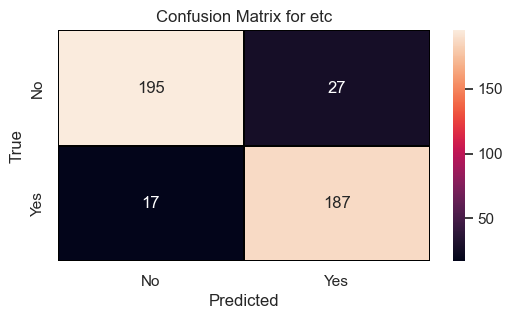

In [84]:
cm=confusion_matrix(y_test,pred_e)
x_axis_labels= ["No","Yes"]
y_axis_labels= ["No","Yes"]
f,ax = plt.subplots(figsize=(6,3))
sns.heatmap(cm, annot=True, linewidth=.2, linecolor="black",fmt='.0f',ax=ax, 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for etc')
plt.show()

## Decision Tree Classifier:

In [85]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_d=dtc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,pred_d))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_d))
print(classification_report(y_test,pred_d))

Accuracy Score:  0.863849765258216
Confusion Matrix:  [[187  35]
 [ 23 181]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       222
           1       0.84      0.89      0.86       204

    accuracy                           0.86       426
   macro avg       0.86      0.86      0.86       426
weighted avg       0.87      0.86      0.86       426



here we can see that the DTC accuracy is 86 %

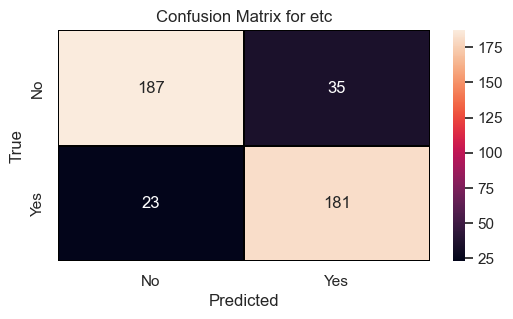

In [86]:
cm=confusion_matrix(y_test,pred_d)
x_axis_labels= ["No","Yes"]
y_axis_labels= ["No","Yes"]
f,ax = plt.subplots(figsize=(6,3))
sns.heatmap(cm, annot=True, linewidth=.2, linecolor="black",fmt='.0f',ax=ax, 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for etc')
plt.show()

## Gradient Boosting classifier

In [87]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_g=gbc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,pred_g))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_g))
print(classification_report(y_test,pred_e))

Accuracy Score:  0.9061032863849765
Confusion Matrix:  [[196  26]
 [ 14 190]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       222
           1       0.87      0.92      0.89       204

    accuracy                           0.90       426
   macro avg       0.90      0.90      0.90       426
weighted avg       0.90      0.90      0.90       426



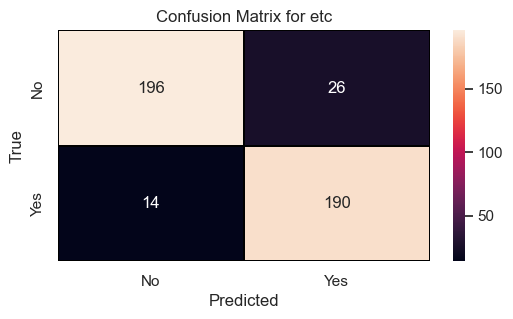

In [88]:
cm=confusion_matrix(y_test,pred_g)
x_axis_labels= ["No","Yes"]
y_axis_labels= ["No","Yes"]
f,ax = plt.subplots(figsize=(6,3))
sns.heatmap(cm, annot=True, linewidth=.2, linecolor="black",fmt='.0f',ax=ax, 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for etc')
plt.show()

## Random forest Classifier

In [89]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_r=rfc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,pred_r))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_r))
print(classification_report(y_test,pred_r))

Accuracy Score:  0.8896713615023474
Confusion Matrix:  [[200  22]
 [ 25 179]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       222
           1       0.89      0.88      0.88       204

    accuracy                           0.89       426
   macro avg       0.89      0.89      0.89       426
weighted avg       0.89      0.89      0.89       426



Accurcy score is 88%

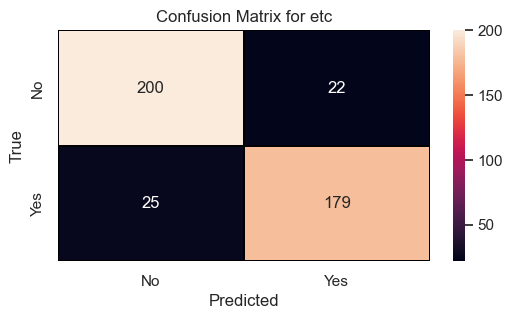

In [90]:
cm=confusion_matrix(y_test,pred_r)
x_axis_labels= ["No","Yes"]
y_axis_labels= ["No","Yes"]
f,ax = plt.subplots(figsize=(6,3))
sns.heatmap(cm, annot=True, linewidth=.2, linecolor="black",fmt='.0f',ax=ax, 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for etc')
plt.show()

## KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn=KNN()
knn.fit(x_train,y_train)
pred_k=knn.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,pred_k))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_k))
print(classification_report(y_test,pred_k))

Accuracy Score:  0.6690140845070423
Confusion Matrix:  [[ 88 134]
 [  7 197]]
              precision    recall  f1-score   support

           0       0.93      0.40      0.56       222
           1       0.60      0.97      0.74       204

    accuracy                           0.67       426
   macro avg       0.76      0.68      0.65       426
weighted avg       0.77      0.67      0.64       426



Accuracy of KNN is 66%

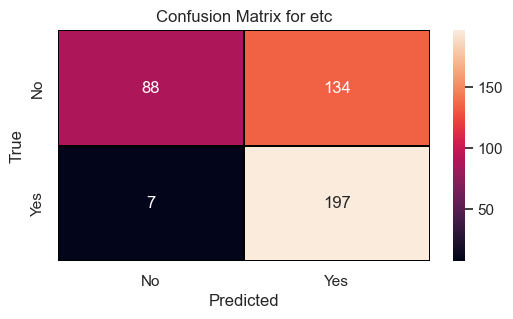

In [95]:
cm=confusion_matrix(y_test,pred_k)
x_axis_labels= ["No","Yes"]
y_axis_labels= ["No","Yes"]
f,ax = plt.subplots(figsize=(6,3))
sns.heatmap(cm, annot=True, linewidth=.2, linecolor="black",fmt='.0f',ax=ax, 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for etc')
plt.show()

Lets do the Cross Validation

# Cross Validation

In [96]:
# cv score for KNN
print('KNN')
print(cross_val_score(knn,x,y,cv=5).mean())
print("--"*100)
# cv score for etc
print('ETC')
print(cross_val_score(etc,x,y,cv=5).mean())
print("--"*100)
# cv score for gbc
print('GBC')
print(cross_val_score(gbc,x,y,cv=5).mean())
print("--"*100)
# cv score for dtc
print('DTC')
print(cross_val_score(dtc,x,y,cv=5).mean())
print("--"*100)
# cv score for rfc
print('RFC')
print(cross_val_score(rfc,x,y,cv=5).mean())
print("--"*100)

KNN
0.6605633802816901
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ETC
0.914788732394366
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
GBC
0.8711267605633803
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
DTC
0.8253521126760562
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
RFC
0.8711267605633803
----------------------------------------------------------------------------------

Here the Cross Validation scores of all the models

Least difference between model accuracy and cross_val_score. Here ExtraTreesClassifier cross validation score came almost 2% higher than the accuracy score. so i found etc as my best model

## HYPER PARAMETER TUNNING

In [97]:
# lets import required library
from sklearn.model_selection import GridSearchCV

In [98]:
parameter= {'criterion':['gini','entropy'],
             'random_state': [10,50,100,200,300,400,500,600,1000],
             'n_jobs':[-2,-1,1,2,3,4,5,6],
             'n_estimators':[10,50,100,200,300],
             'max_depth': [0,10,20,30,40,50,60,70]}

In [99]:
gcv=GridSearchCV(ExtraTreesClassifier(),parameter,cv=5)

In [100]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20, 30, 40, 50, 60, 70],
                         'n_estimators': [10, 50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1, 2, 3, 4, 5, 6],
                         'random_state': [10, 50, 100, 200, 300, 400, 500, 600,
                                          1000]})

In [101]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 10}

In [102]:
model=ExtraTreesClassifier(criterion='gini', max_depth=20 ,n_estimators=50 , n_jobs=-2 , random_state=10 )
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc=accuracy_score(y_test, pred)

print('Accuracy Score:',(accuracy_score(y_test,pred)*100))
print('Confusion matrix:',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score: 91.07981220657277
Confusion matrix: [[203  19]
 [ 19 185]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       222
           1       0.91      0.91      0.91       204

    accuracy                           0.91       426
   macro avg       0.91      0.91      0.91       426
weighted avg       0.91      0.91      0.91       426



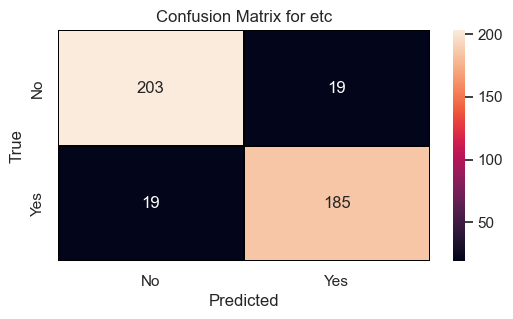

In [103]:
cm=confusion_matrix(y_test,pred)
x_axis_labels= ["No","Yes"]
y_axis_labels= ["No","Yes"]
f,ax = plt.subplots(figsize=(6,3))
sns.heatmap(cm, annot=True, linewidth=.2, linecolor="black",fmt='.0f',ax=ax, 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for etc')
plt.show()

# ROC-AUC-curve:

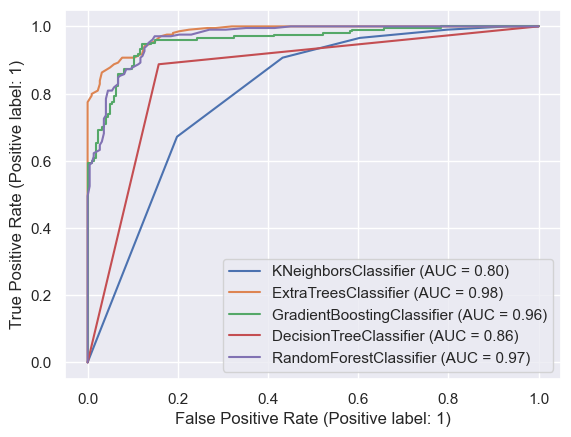

In [104]:
# lets import all required libraries
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(knn,x_test,y_test)
# ax_=Axes with confusion matrix
plot_roc_curve(etc, x_test, y_test, ax=disp.ax_)     
plot_roc_curve(gbc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(dtc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(rfc, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Here are the ROC curves for all the models that i have predicted and the AUC values can also be seen in the plot itself

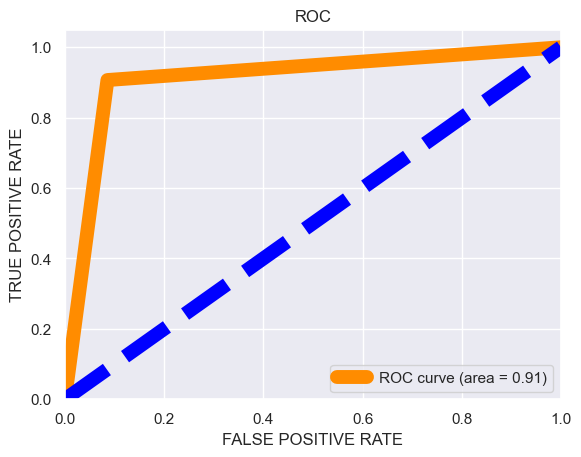

In [106]:
from sklearn.metrics import auc, roc_auc_score, roc_curve
fpr,tpr,threshold = roc_curve(pred, y_test)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color = 'darkorange', lw = 10, label = 'ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color = 'blue', lw = 10, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC")
plt.legend(loc = "lower right")
plt.show()

## Saving the Model

In [107]:
#Saving the model as .pkl file
import joblib
joblib.dump(model,"Insurance_Claim_Fraud_Detection.pkl")

['Insurance_Claim_Fraud_Detection.pkl']

In [108]:
final_model = joblib.load("Insurance_Claim_Fraud_Detection.pkl")
prediction = final_model.predict(x_test)
prediction

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,

In [109]:
a= np.array(y_test)
data = pd.DataFrame()
data["predicted"] = prediction
data["original"]  = a
data

predicted  original
0            0         0
1            0         0
2            1         1
3            0         0
4            0         0
..         ...       ...
421          0         0
422          1         1
423          1         1
424          1         1
425          0         1

[426 rows x 2 columns]

## Creating DataFrame

In [110]:
conclusion = pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ["predicted","original"])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  416  417  \
predicted    0    0    1    0    0    0    1    1    0    0  ...    1    1   
original     0    0    1    0    0    0    1    1    0    0  ...    1    1   

           418  419  420  421  422  423  424  425  
predicted    0    0    1    0    1    1    1    0  
original     0    0    1    0    1    1    1    1  

[2 rows x 426 columns]